This notebook contains the Exploratory Data Analysis, data processing, and model building for project **EcoProphet:Intelligent CO2 Forecast**.

[Dataset](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles) captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website.

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Exploratory Data Analysis](#data_preparation)**
    - 4.1 - [Preparing the Dataset](#Data_Preparing)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Missing Values](#Missing_Values)
        - 4.1.4 - [Duplicate Data](#duplicate)
    - 4.2 - [Understanding the Dataset](#Data_Understanding)
        - 4.2.1 - [Summary Statistics](#Summary_Statistics)
        - 4.2.2 - [Correlation](#correlation)
        - 4.2.3 - [Analyze Categorical Variables](#analyze_cat_var)
        - 4.2.4 - [Anaylze Target Variable](#analyze_tar_var)
        - 4.2.5 - [Analyze Relationship Between Target and Independent Variables](#analyze_tar_ind_var)
        - 4.2.6 - [Feature Engineering](#feature_eng)
5. **[Data Pre-Processing](#data_pre)**
    - 5.1 - [Outliers](#out)
        - 5.1.1 - [Discovery of Outliers](#dis_out)
        - 5.1.2 - [Removal of Outliers](#rem_out)
        - 5.1.3 - [Rechecking of Correlation](#rec_cor)
    - 5.2 - [Categorical Encoding](#cat_enc)
6. **[Building Multiple Linear Regression Models](#bui_mlr_mod)**
    - 6.1 - [Multiple Linear Regression - Basic Model](#bas_mod)
    - 6.2 - [Feature Transformation](#fea_tra)
    - 6.3 - [Feature Scaling](#fea_sca)
    - 6.4 - [Multiple Linear Regression - Full Model - After Feature Scaling](#mod_aft_sca)
    - 6.5 - [Assumptions Before Multiple Linear Regression Model](#ass_bef)
        - 6.5.1 - [Assumption #1: If Target Variable is Numeric](#tgt_num)
        - 6.5.2 - [Assumption #2: Presence of Multi-Collinearity](#pre_mul_col)
    - 6.6 - [Multiple Linear Regression - Full Model - After PCA](#mod_pca)
    - 6.7 - [Feature Selection](#fea_sel)
        - 6.7.1 - [Forward Selection](#for_sel)
        - 6.7.2 - [Backward Elimination](#bac_eli)
    - 6.8 - [Multiple Linear Regression - Full Model - After Feature Selection](#mod_fea_sel)
    - 6.9 - [Assumptions After Multiple Linear Regression Model](#ass_aft)
        - 6.9.1 - [Assumption #1: Linear Relationship Between Dependent and Independent Variable](#lr_dep_ind)
        - 6.9.2 - [Assumption #2: Checking for Autocorrelation](#che_aut_cor)
        - 6.9.3 - [Assumption #3: Checking for Heterskedacity](#che_het)
        - 6.9.4 - [Assumption #4: Test for Normality](#tes_nor)
            - 6.9.4.1 - [Q-Q Plot](#qq_plt)
            - 6.9.4.2 - [Shapiro Wilk Test](#sha_wil_tes)
7. **[Model Evaluation](#mod_eva)**
    - 7.1 - [Measures of Variation](#mea_var)
    - 7.2 - [Inferences about Intercept and Slope](#inf_int_slo)
    - 7.3 - [Confidence Interval for Intercept and Slope](#con_int_slo)
    - 7.4 - [Compare Regression Results](#com_reg_res)
8. **[Model Performance](#mod_per)**
    - 8.1 - [Mean Square Error(MSE)](#mse)
    - 8.2 - [Root Mean Squared Error(RMSE)](#rmse)
    - 8.3 - [Mean Absolute Error(MAE)](#mae)
    - 8.4 - [Mean Absolute Percentage Error(MAPE)](#mape)
    - 8.5 - [Resultant Table](#res_tab)

#### **Data Description**


**Model**

1. 4WD/4X4 = Four-wheel drive
2. AWD = All-wheel drive
3. FFV = Flexible-fuel vehicle
4. SWB = Short wheelbase
5. LWB = Long wheelbase
6. EWB = Extended wheelbase

**Transmission**

1. A = Automatic
2. AM = Automated manual
3. AS = Automatic with select shift
4. AV = Continuously variable
5. M = Manual
6. 3 - 10 = Number of gears

**Fuel type**

1. X = Regular gasoline
2. Z = Premium gasoline
3. D = Diesel
4. E = Ethanol (E85)
5. N = Natural gas

**Fuel Consumption**

City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg).

**CO2 Emissions**

The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

# 1. Import Libraries <a id='import_lib'></a>

In [6]:
!pip install mlxtend -qq

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
from scipy import stats
import statsmodels.api as sm
from scipy.stats import shapiro
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import Lasso, Ridge, ElasticNet, SGDRegressor, LinearRegression
from sklearn.model_selection import KFold, LeaveOneOut, GridSearchCV, cross_val_score, train_test_split

%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

# 2. Set Options <a id='set_options'></a>

In [11]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format

# 3. Read Data <a id='Read_Data'></a>

In [14]:
data = pd.read_csv("CO2 Emissions_Canada.csv")

data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.000000,4,AS5,Z,9.900000,6.700000,8.500000,33,196
1,ACURA,ILX,COMPACT,2.400000,4,M6,Z,11.200000,7.700000,9.600000,29,221
2,ACURA,ILX HYBRID,COMPACT,1.500000,4,AV7,Z,6.000000,5.800000,5.900000,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.500000,6,AS6,Z,12.700000,9.100000,11.100000,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.500000,6,AS6,Z,12.100000,8.700000,10.600000,27,244


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

# 4. Exploratory Data Analysis <a id='data_preparation'></a>

## 4.1 Preparing the Dataset <a id='Data_Preparing'></a>

**Renaming Columns**

In [21]:
data = data.rename(columns={
    'Vehicle Class': 'Vehicle_Class',
    'Engine Size(L)': 'Engine_Size',
    'Fuel Type': 'Fuel_Type', 
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb1',
    'CO2 Emissions(g/km)': 'CO2_Emissions'    
})

### 4.1.1 Data Dimensions <a id='Data_Shape'></a>

In [24]:
data.shape

(7385, 12)

In this dataset we have 7385 records across 12 features

### 4.1.2 Data Types <a id='Data_Types'></a>

In [28]:
data.dtypes

Make                       object
Model                      object
Vehicle_Class              object
Engine_Size               float64
Cylinders                   int64
Transmission               object
Fuel_Type                  object
Fuel_Consumption_City     float64
Fuel_Consumption_Hwy      float64
Fuel_Consumption_Comb     float64
Fuel_Consumption_Comb1      int64
CO2_Emissions               int64
dtype: object

The dataset contains **5 object columns, 3 int column and 4 float columns**

### 4.1.3 Missing Values <a id='Missing_Values'></a>

In [32]:
missing_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Percentage': (data.isnull().sum() / len(data))*100
})

In [34]:
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
Make,0,0.000000
Model,0,0.000000
Vehicle_Class,0,0.000000
Engine_Size,0,0.000000
Cylinders,0,0.000000
Transmission,0,0.000000
Fuel_Type,0,0.000000
Fuel_Consumption_City,0,0.000000
Fuel_Consumption_Hwy,0,0.000000
Fuel_Consumption_Comb,0,0.000000


There are **no missing values** present in this dataset

### 4.1.4 Duplicate Data <a id='duplicate'></a>

In [38]:
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1103 duplicated rows in the data


In [40]:
data.drop_duplicates(inplace=True)

In [42]:
data.reset_index(inplace=True, drop=True)

Now, the dataset has **6281 records and 12 features with no missing and duplicate values**

## 4.2  Data Understanding <a id='Data_Understanding'></a>

### 4.2.1 Summary Statistics <a id='Summary_Statistics'></a>

In [47]:
data.describe(include=np.number)

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


1. The average amount of CO2 emitted from cars is 251 g/km
2. Atleast 4 Litres of fuel is consumed be it the car is on city roads or highway
3. About 75% of the cars have 6 or less cylinders
4. The amount of fuel consumed by cars on city roads is comparitvely greater than that of highway

In [50]:
data.describe(include = object)

,Make,Model,Vehicle_Class,Transmission,Fuel_Type
count,6282,6282,6282,6282,6282
unique,42,2053,16,27,5
top,FORD,F-150 FFV,SUV - SMALL,AS6,X
freq,577,32,1006,1139,3039


In [52]:
# Check for the presence of object columns
object_columns = data.select_dtypes(include='object').columns

if len(object_columns) > 0:
    # Run describe only if there are object columns
    print(data.describe(include='object'))
else:
    print("No object type columns found in the dataset.")

        Make      Model Vehicle_Class Transmission Fuel_Type
count   6282       6282          6282         6282      6282
unique    42       2053            16           27         5
top     FORD  F-150 FFV   SUV - SMALL          AS6         X
freq     577         32          1006         1139      3039


1. There are a total of 42 different car companies with 2053 different car models
2. Vehicles are divided into 16 different classes with SUV-Small vehicles frequenting the most
3. 4 different types of fuels used by cars have been identified and fuel X seems to be the most famous
4. Most of the cars have AS6 transmission

### 4.2.2 Correlation <a id='correlation'></a>

In [56]:
data_num_features = data.select_dtypes(include=np.number)

print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb1', 'CO2_Emissions'],
      dtype='object')


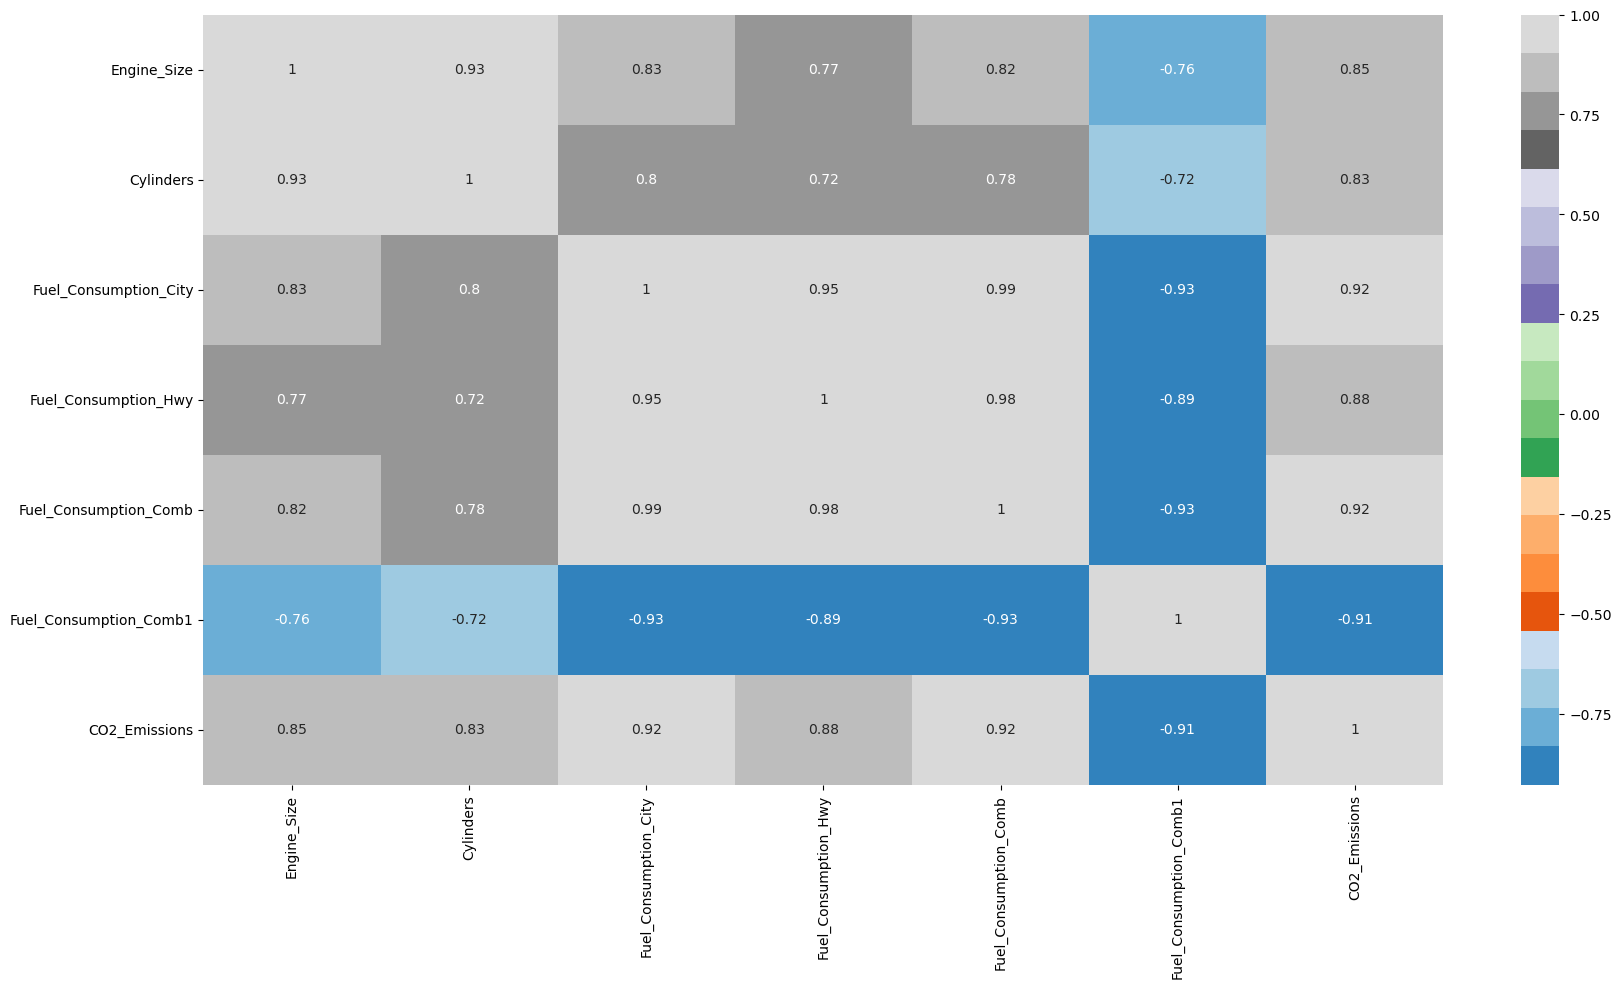

In [58]:
plt.figure(figsize=(20,10))

corr =  data_num_features.corr()

corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

1. Fuel_Consumption_Comb1 has a high negative correaltion(<-0.9) with CO2_Emissions, Fuel_Consumption_Comb and Fuel_Consumption_City
2. CO2_Emissions has high positive correlation(>0.9) with Fuel_Consumption_Comb and Fuel_Consumption_City

### 4.2.3 Analyse Categorical Variables <a id='analyze_cat_var'></a>

In [62]:
data_cat_features = data.select_dtypes(include='object')
data_cat_features1 = data_cat_features[['Vehicle_Class', 'Transmission', 'Fuel_Type', 'Model','Make']]

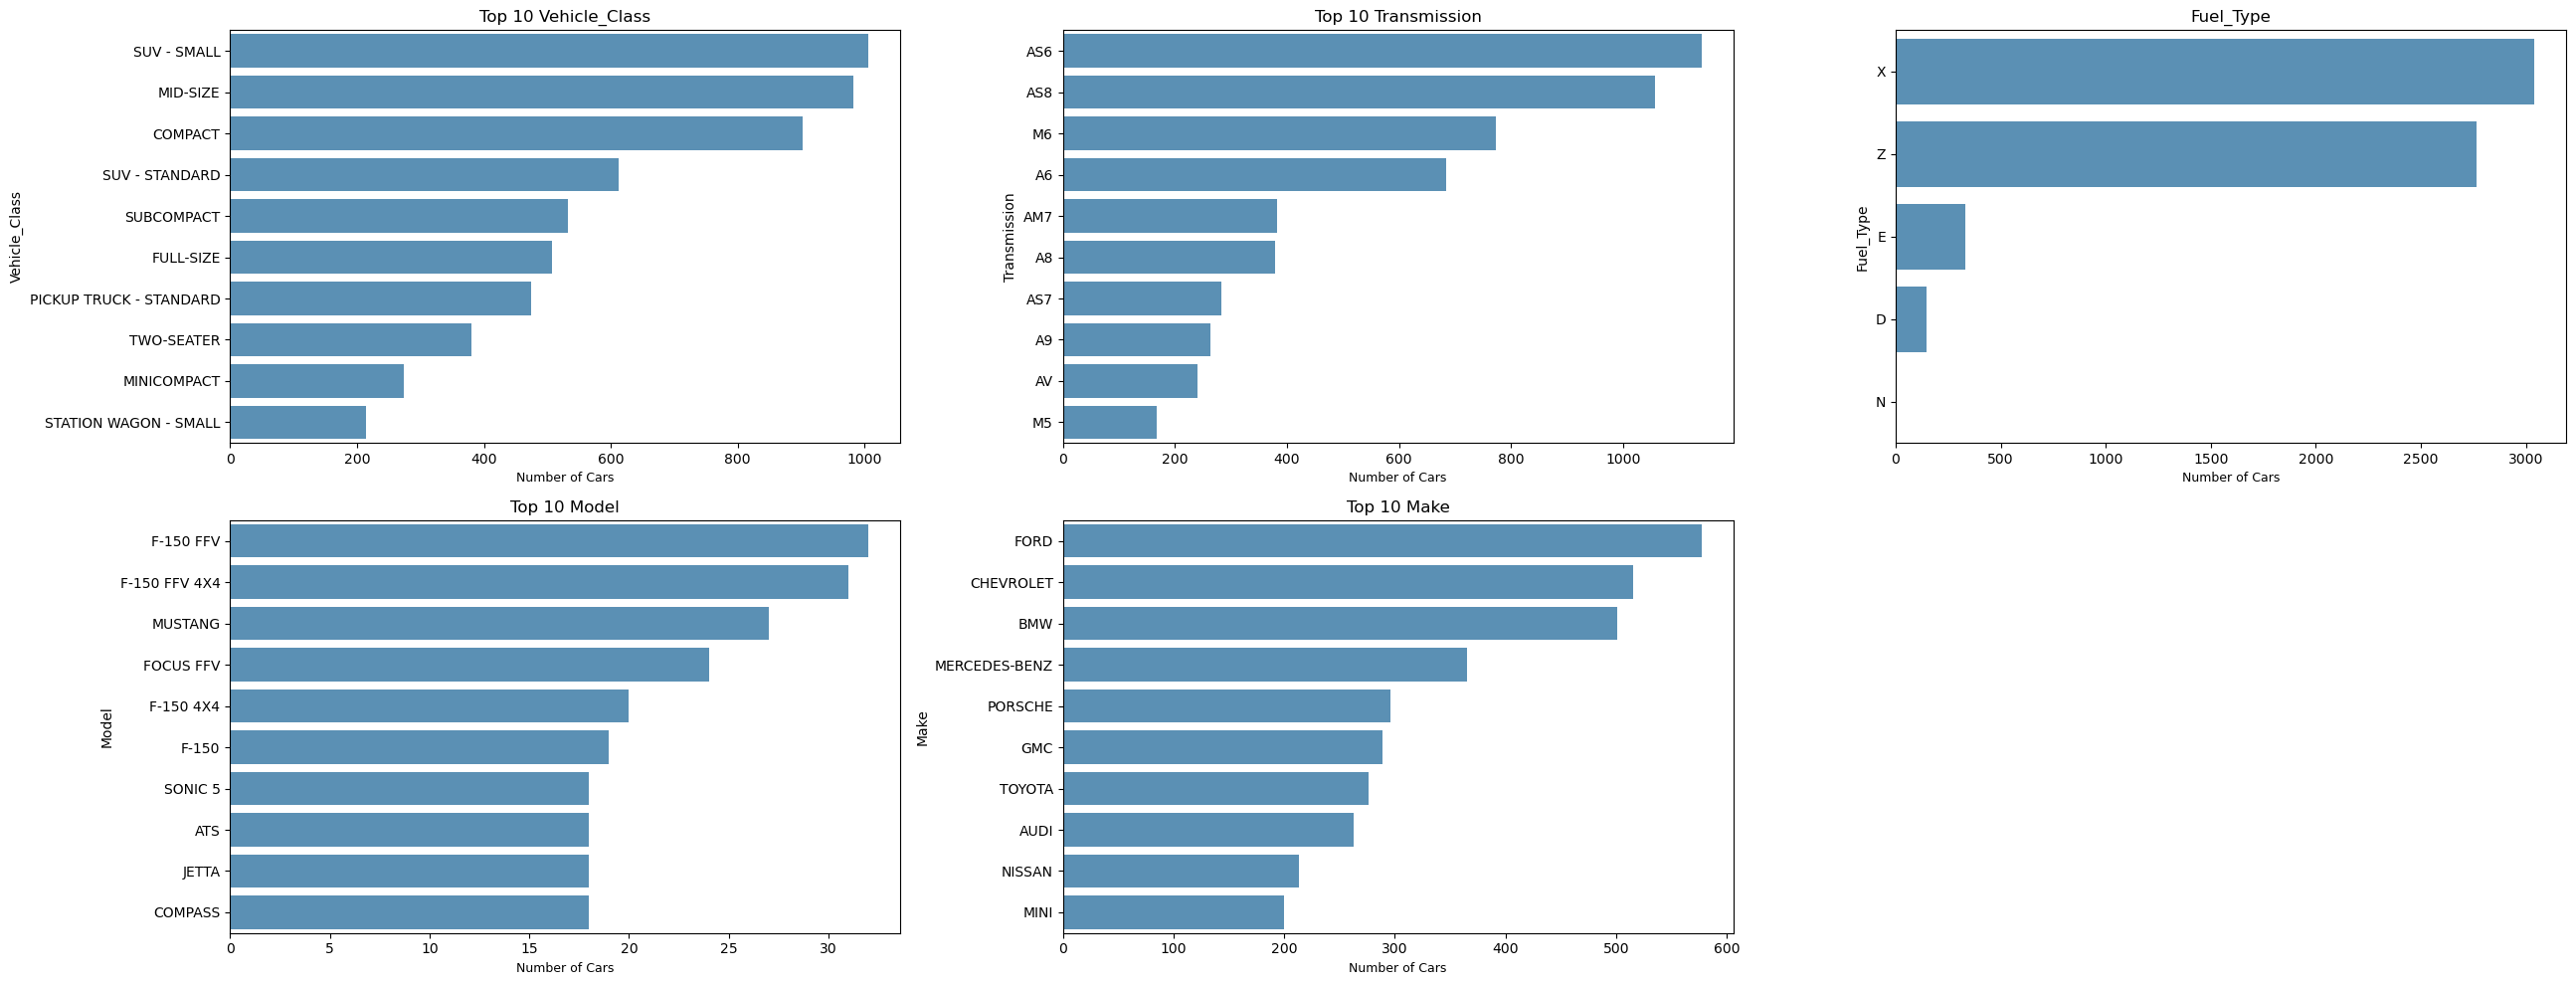

In [64]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(26, 10))

for variable, subplot in zip(data_cat_features1.columns, ax.flatten()):
    cat_count = data[variable].value_counts()
    
    cat_count10 = cat_count[:10]
    z = sns.barplot(x=cat_count10.values, y=cat_count10.index, alpha=0.8, ax=subplot)
    
    if cat_count.size > 10:
        z.set_title('Top 10 {}'.format(variable))
    else:
        z.set_title(variable)
    
    z.set_xlabel('Number of Cars', fontsize=9)
    
fig.delaxes(ax[1, 2])

plt.tight_layout()
plt.show()

1. Top 10 Make: Most of the cars on Canadian roads are made by Ford
2. Top 10 Model: The F-150 FFV is amongst the most famous models driven in Canada
3. Top 10 Vehicle_Class: SUV-Small is the preferred class of vehicle amongst the Canadians
4. Top 10 Transmission: More than 1000 cars have AS6 and AS8 transmission types
5. Fuel Type: Majority of the cars in Canada use Fuel type X and Z

### 4.2.4 Analyse Target Variable <a id='analyze_tar_var'></a>

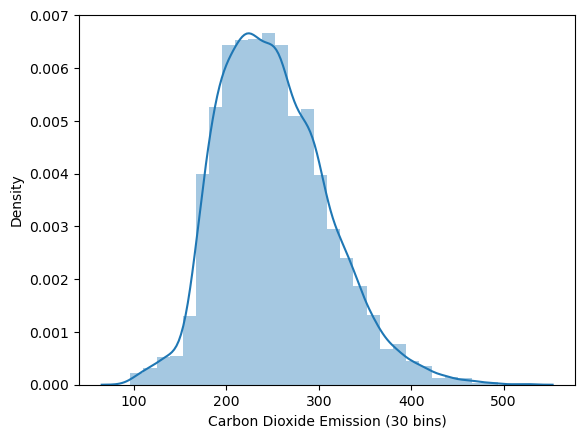

In [68]:
sns.distplot(data['CO2_Emissions'], bins=30, kde=True, axlabel='Carbon Dioxide Emission (30 bins)')
plt.show()

From the above histogram, we can see that CO2_Emissions is moderately positive skewed

In [71]:
mean = data['CO2_Emissions'].mean()
mode = data['CO2_Emissions'].mode()
median = data['CO2_Emissions'].median()

print(f'Mean for CO2 Emission is {mean}')
print(f'Median for CO2 Emission is {median}')
print(f'Mode for CO2 Emission is {mode}')

Mean for CO2 Emission is 251.1577523081821
Median for CO2 Emission is 246.0
Mode for CO2 Emission is 0    221
1    246
Name: CO2_Emissions, dtype: int64


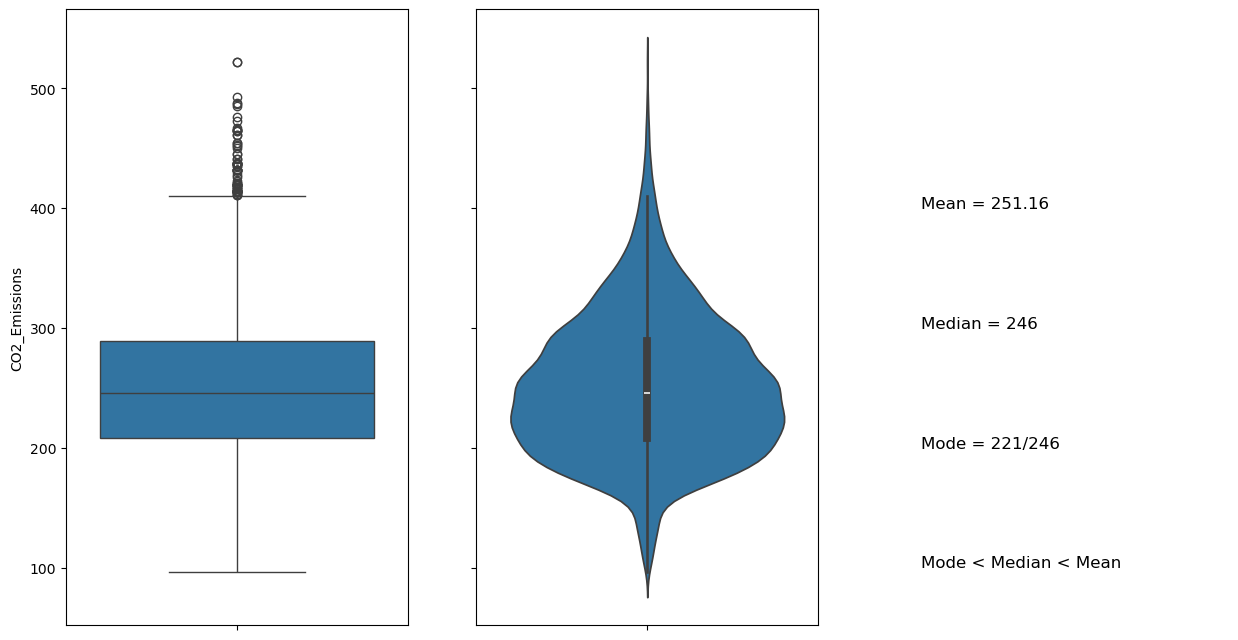

In [73]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,8))
sns.boxplot(y=data['CO2_Emissions'], orient="v", ax = axes[0])
sns.violinplot(y=data['CO2_Emissions'], orient="v", ax = axes[1]);
plt.text(0.1, 200, "Mode = 221/246", fontsize=12)
plt.text(0.1, 300, "Median = 246", fontsize=12)
plt.text(0.1, 400, "Mean = 251.16", fontsize=12)
plt.text(0.1, 100, "Mode < Median < Mean", fontsize=12)
plt.axis("off")
plt.show()

Of all the three statistics, the mean is the largest, while the mode is the smallest thus CO2_Emissions is positively skewed which implies that most of the CO2 Emissions are less than the average CO2 Emissions.

### 4.2.5 Analyse Relationship between Target and Independent Variables <a id='analyze_tar_ind_var'></a>

In [77]:
make_co2 = data.groupby('Make')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
model_co2 = data.groupby('Model')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
vehicle_class_co2 = data.groupby('Vehicle_Class')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
transmission_co2 = data.groupby('Transmission')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
fuel_type_co2 = data.groupby('Fuel_Type')['CO2_Emissions'].mean().sort_values(ascending=False).head()

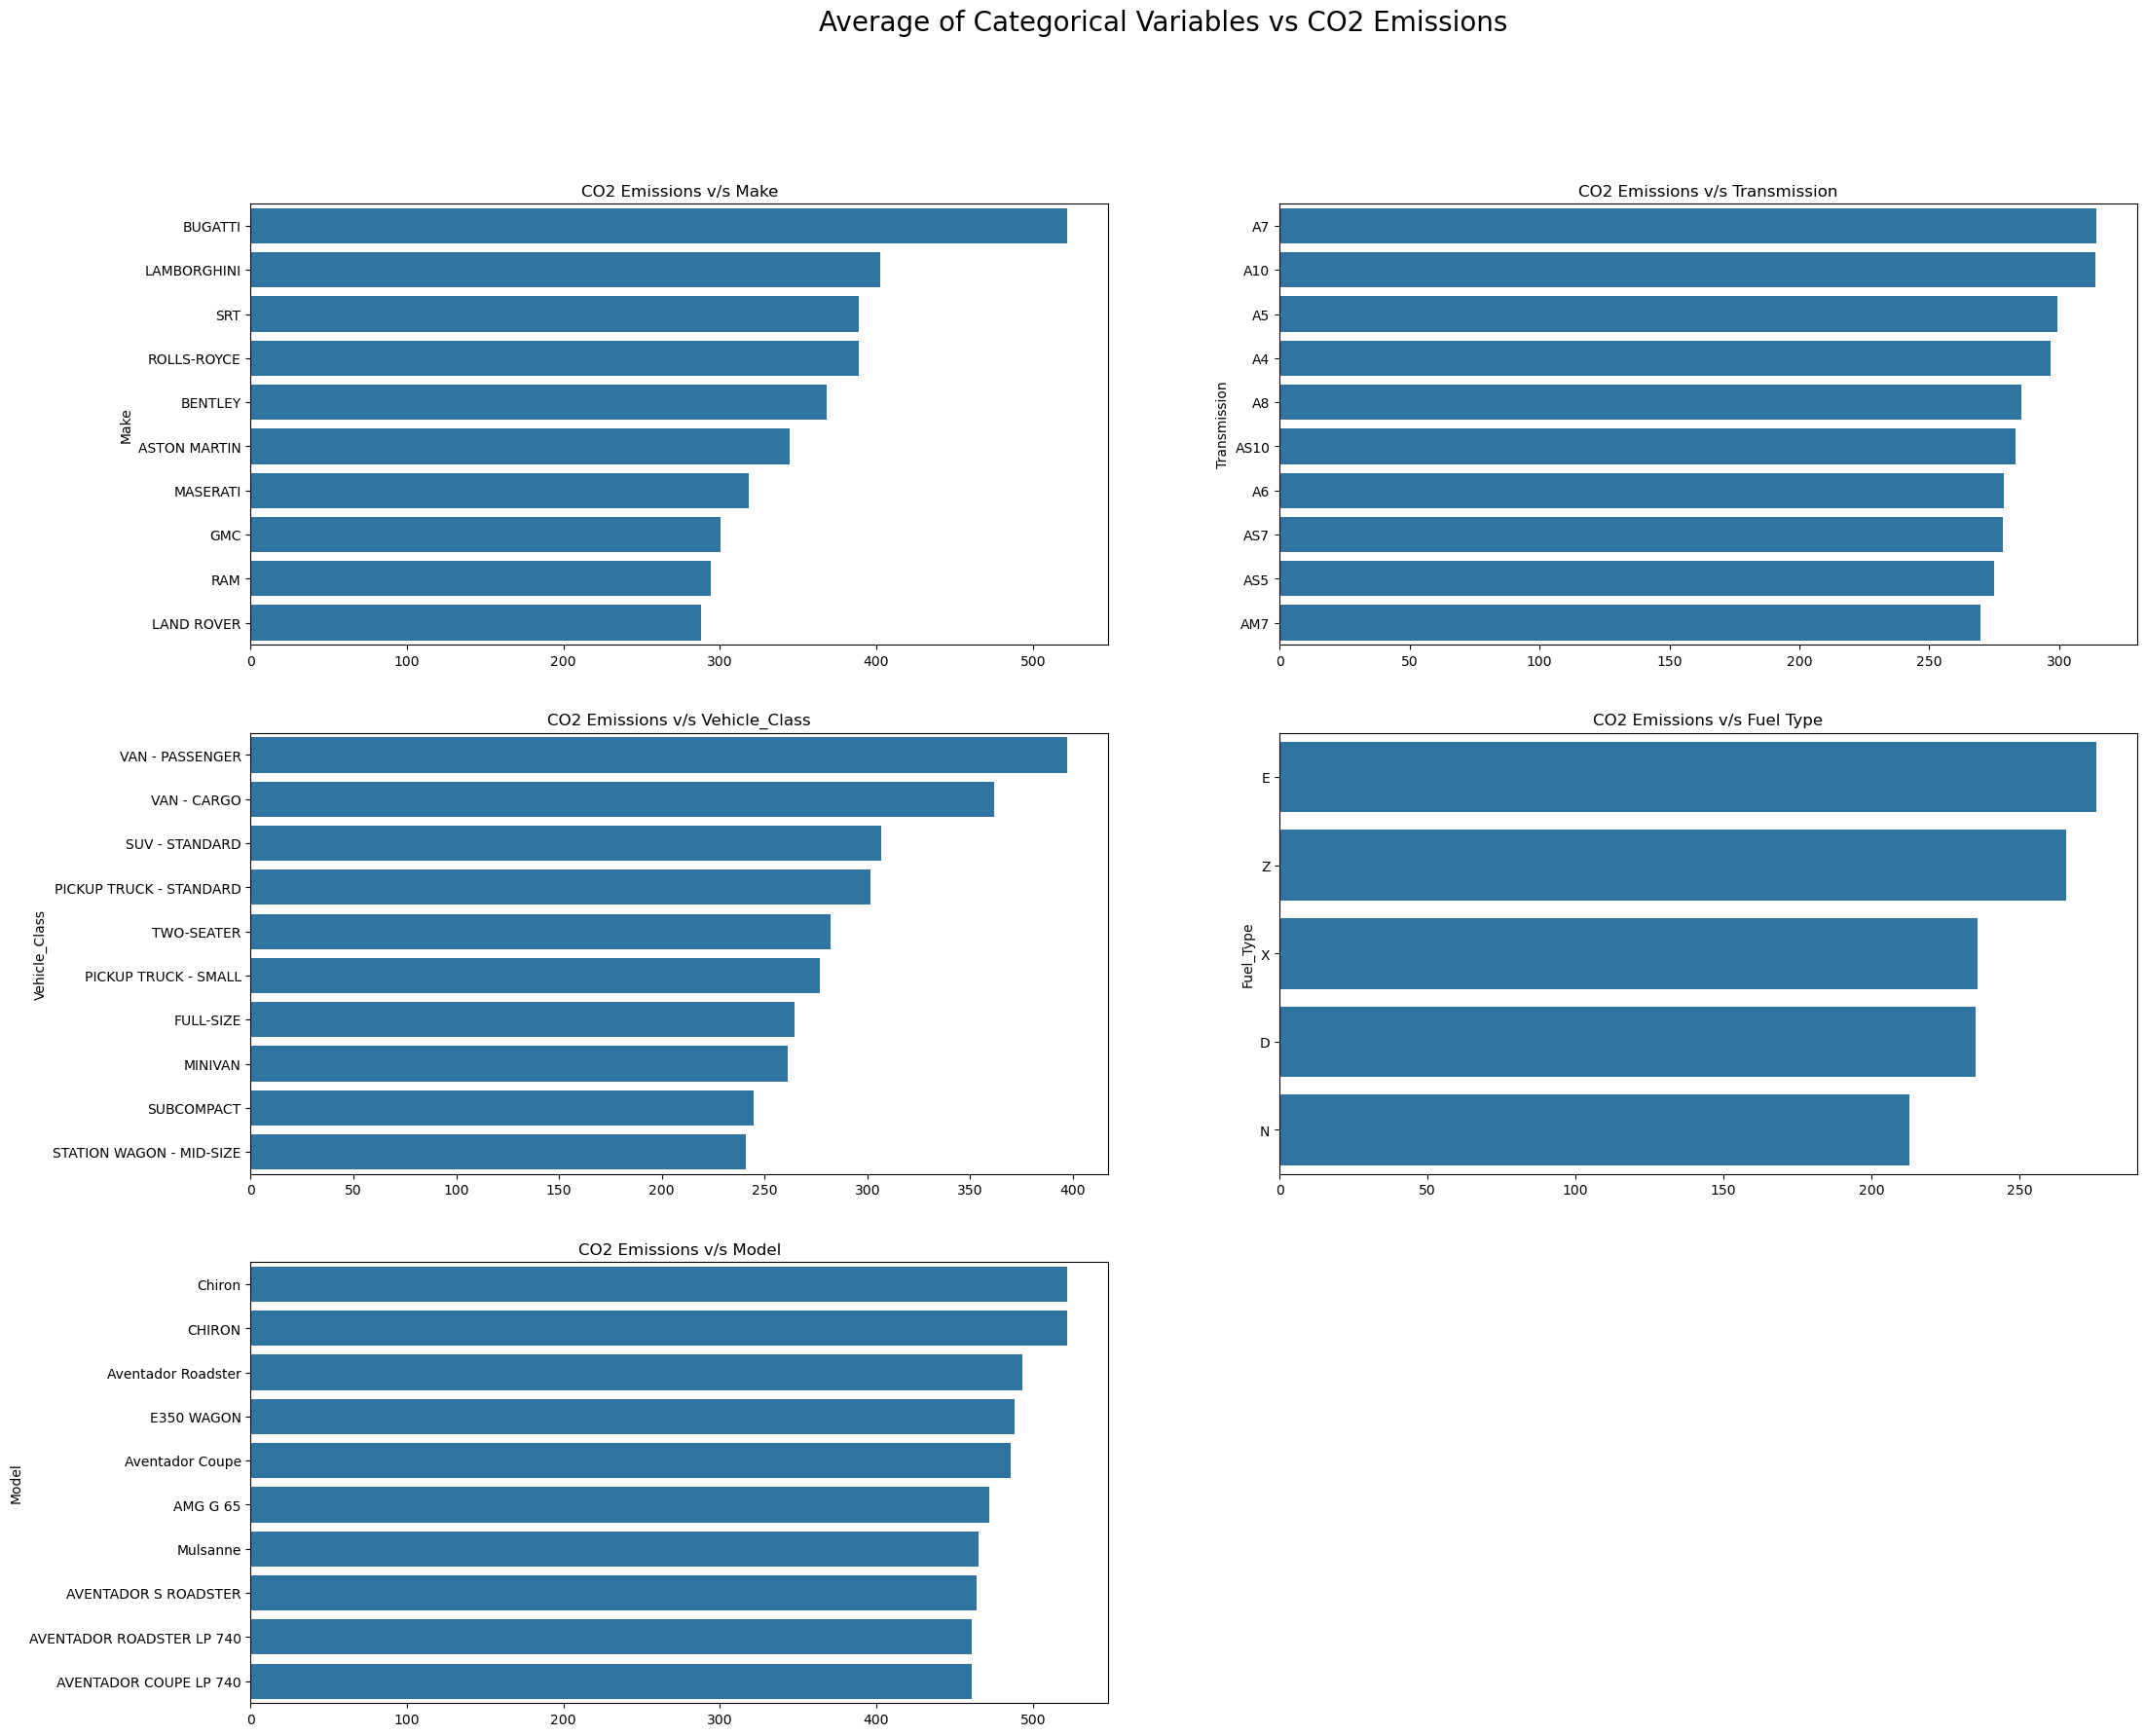

In [79]:
fig, axes = plt.subplots(3,2, figsize=(25,20))
fig.suptitle('Average of Categorical Variables vs CO2 Emissions', size=20)

sns.barplot(ax=axes[0][0],x = make_co2.values,y = make_co2.index)
axes[0][0].set_title('CO2 Emissions v/s Make')

sns.barplot(ax=axes[0][1],x = transmission_co2.values,y = transmission_co2.index)
axes[0][1].set_title('CO2 Emissions v/s Transmission')

sns.barplot(ax=axes[1][0],x = vehicle_class_co2.values,y = vehicle_class_co2.index)
axes[1][0].set_title('CO2 Emissions v/s Vehicle_Class')

sns.barplot(ax=axes[1][1], x=fuel_type_co2.values,y=fuel_type_co2.index)
axes[1][1].set_title('CO2 Emissions v/s Fuel Type')

sns.barplot(ax=axes[2][0],x = model_co2.values,y = model_co2.index)
axes[2][0].set_title('CO2 Emissions v/s Model')


fig.delaxes(axes[2][1])
plt.show()

1. CO2 Emissions v/s Make: While Ford cars are mainly found on the roads of Canada , its Bugatti that emit the most CO2 per car
2. CO2 Emissions v/s Model: Bugatti Chiron is amongst the most CO2 emitting car model
3. CO2 Emissions v/s Vehicle_Class: Most of the heavy vehicles like Vans , SUV and Pick-up truck are amongst the top few emitters of CO2
4. CO2 Emissions v/s Transmission: Most of the cars with automatic transmission emit CO2
5. CO2 Emissions v/s Fuel_Type: Cars using Fuel Type E are emitting the most CO2

**Relationship between Cylinders and CO2 Emissions**

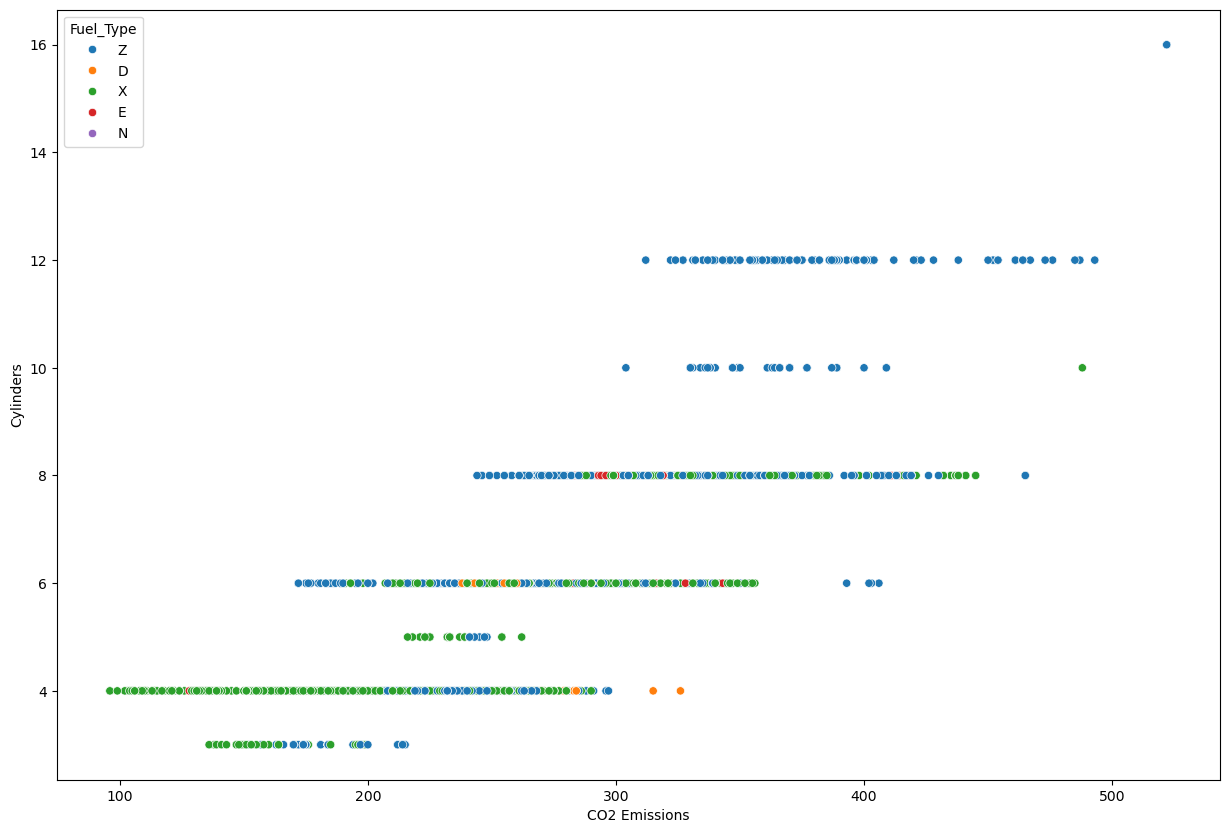

In [83]:
plt.rcParams["figure.figsize"] = (15,10)
sns.scatterplot(x='CO2_Emissions',y='Cylinders',data = data,hue='Fuel_Type')
plt.xlabel("CO2 Emissions", fontsize=10)
plt.ylabel("Cylinders", fontsize=10)
plt.show()

From the above scatter plot we can see that:
1. As the number of cylinders increase, the CO2 emissions increase
2. Cars with 8 and less than 8 cylinders prefer using Fuel Type X which result in less emissions of CO2
3. Fuel Type Z results in more CO2 emissions than the other

<Figure size 1000x500 with 0 Axes>

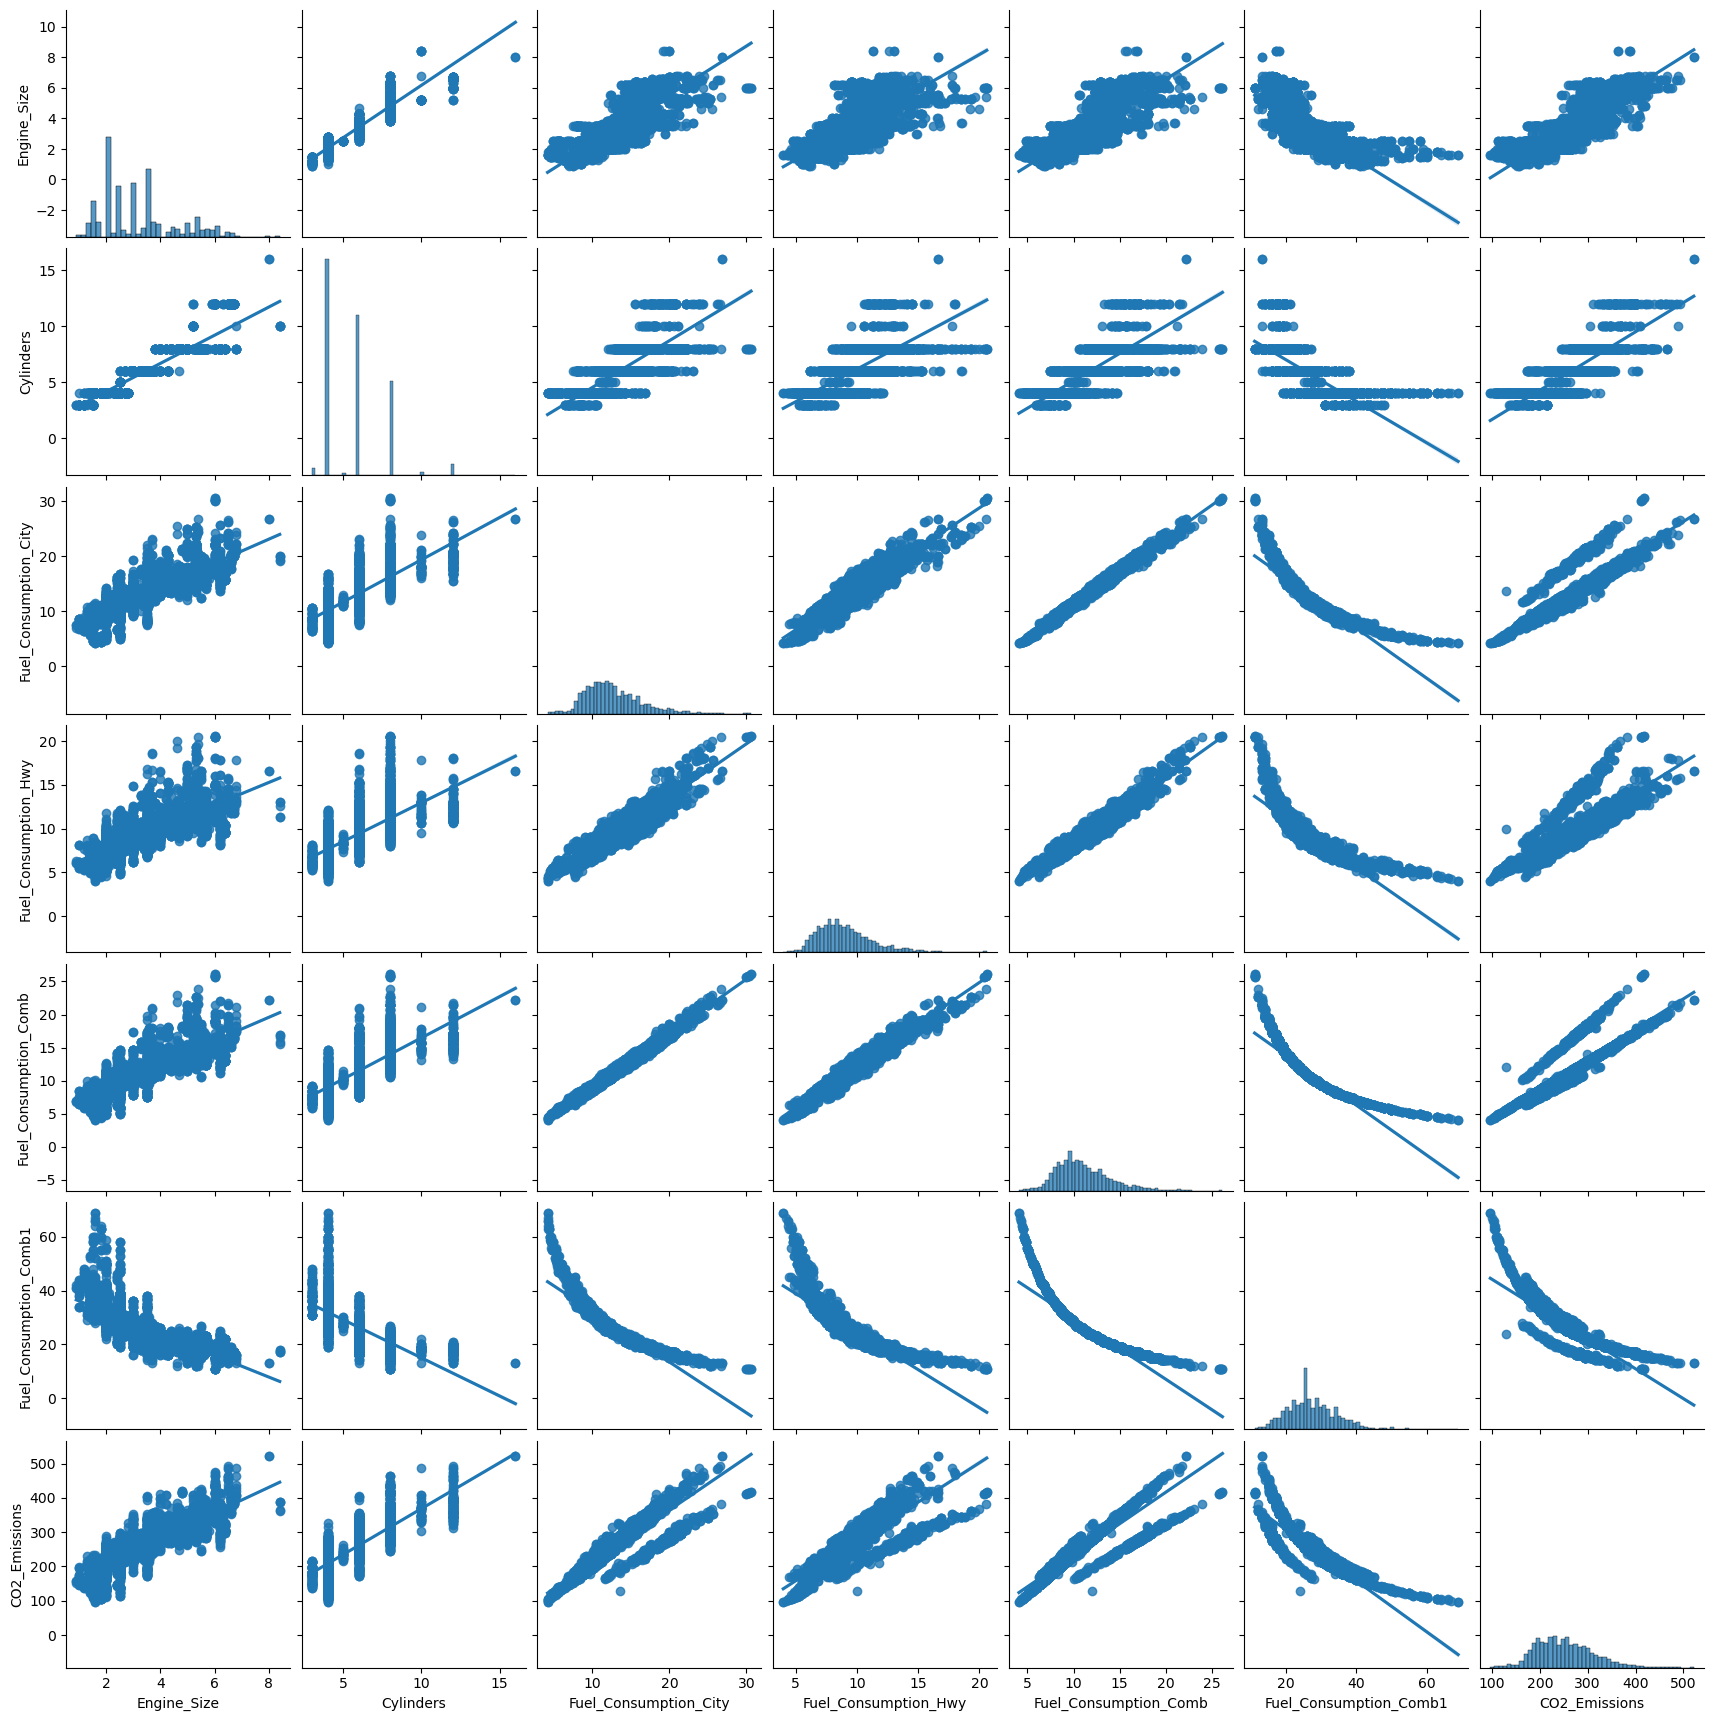

In [86]:
plt.figure(figsize=(10,5))
sns.pairplot(data,kind="reg")
plt.show()

1. Fuel_Consumption_Comb1 shows a negative relation with all the other numerical variables
2. Fuel_Consumption_City and Fuel_Consumption_Hwy are strongly postively related

### 4.2.6 Feature Engineering <a id='feature_eng'></a>

Create a new feature Make_Type by combining various car companies(Make) on the basis of their functionality
<br>
There are 42 unique Car Companies. We will divide these companies into Luxury, Sports, Premium and General cars

In [91]:
data['Make_Type'] = data['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR','SRT'], 'Sports')
data['Make_Type'] = data['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC','INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ','MINI', 'SMART', 'VOLVO'],'Premium')
data['Make_Type'] = data['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',  'GENESIS'], 'Luxury')
data['Make_Type'] = data['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA','VOLKSWAGEN'],'General')

In [93]:
data.drop(['Make'], inplace=True, axis=1)

data['Make_Type'].unique()

array(['Luxury', 'Premium', 'Sports', 'General'], dtype=object)

In [95]:
data['Make_Type'].value_counts()

Make_Type
General    2776
Premium    2731
Sports      546
Luxury      229
Name: count, dtype: int64

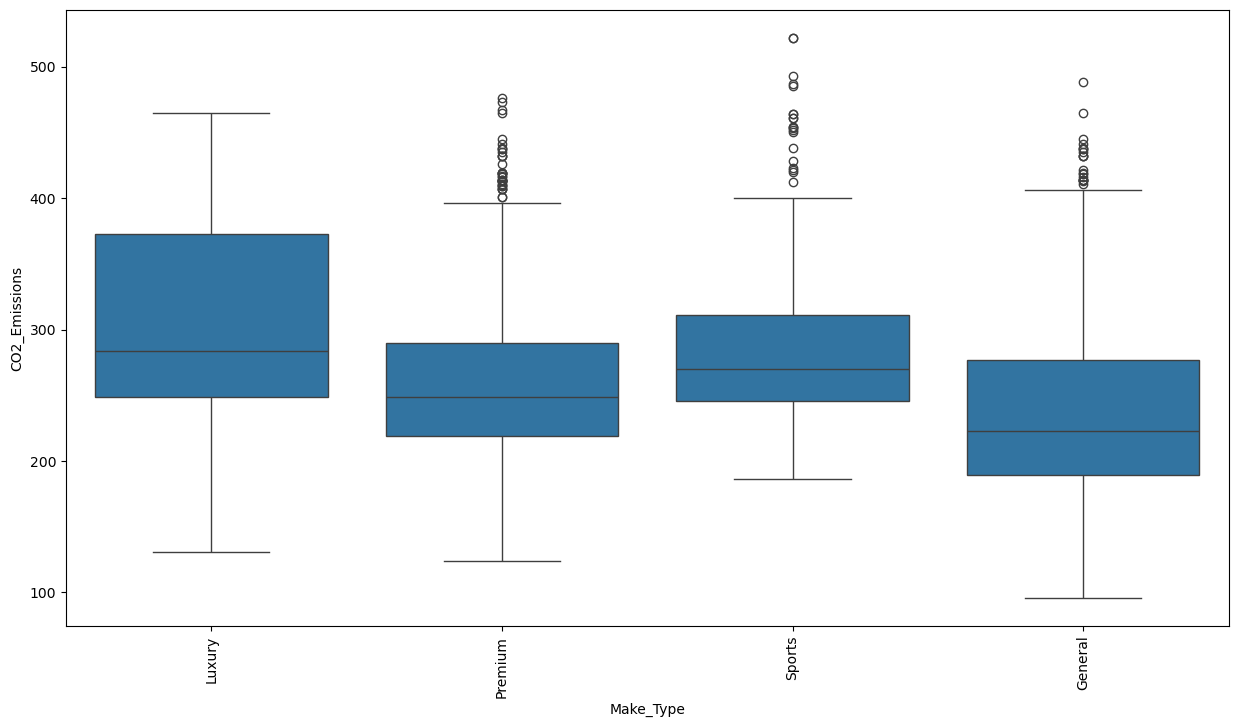

In [97]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Make_Type", y="CO2_Emissions", data=data)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

The plot shows that Sports cars and Luxury cars emit more CO2 compared to Premium and General use cars

Create a new feature Vehicle_Class_Type by combining various Vehicle_Class on the basis of their size
<br>
There are 16 unique Vehicle Classes. We will divide them into Hatchback, Sedan, SUV and Truck

In [101]:
data['Vehicle_Class_Type'] = data['Vehicle_Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'],'Sedan')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],  'SUV')
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')

In [103]:
data.drop(['Vehicle_Class'], inplace=True,  axis=1)

data['Vehicle_Class_Type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'Truck'], dtype=object)

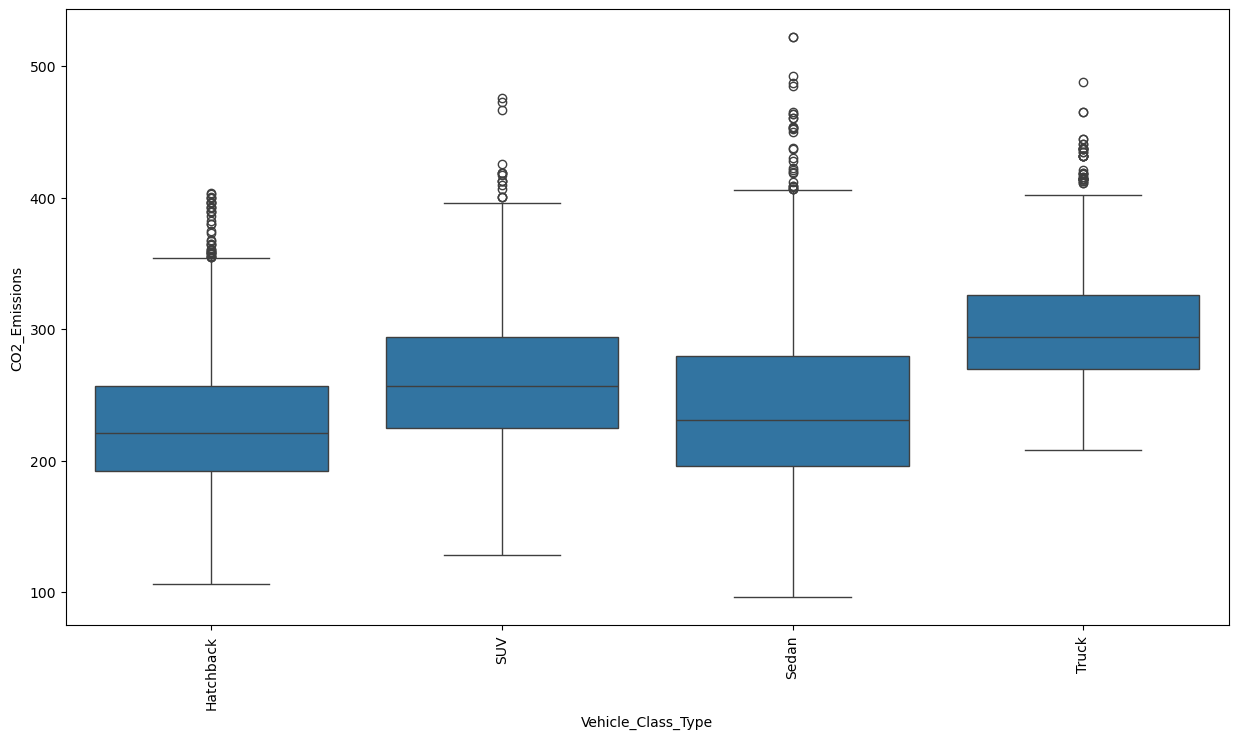

In [105]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="Vehicle_Class_Type", y="CO2_Emissions", data=data)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
plt.show()

The plot shows that the bigger the cars are the more CO2 they emit

# 5. Data Preprocessing <a id='data_pre'></a>

In [109]:
data.drop(['Model'],axis=1,inplace=True)

Since Model has 2053 unique values and has no significance with respect to CO2 Emissions , we have dropped this column

## 5.1 Outliers <a id='out'></a>

### 5.1.1 Discovery of Outliers<a id='dis_out'></a>

In [114]:
df_num_features=data.select_dtypes(include=np.number)

**Identifying outliers using IQR**

In [117]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Engine_Size               1.700000
Cylinders                 2.000000
Fuel_Consumption_City     4.600000
Fuel_Consumption_Hwy      2.800000
Fuel_Consumption_Comb     3.800000
Fuel_Consumption_Comb1   10.000000
CO2_Emissions            81.000000
dtype: float64


In [119]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column Engine_Size are 121
Total number of Outliers in column Cylinders are 177
Total number of Outliers in column Fuel_Consumption_City are 116
Total number of Outliers in column Fuel_Consumption_Hwy are 150
Total number of Outliers in column Fuel_Consumption_Comb are 115
Total number of Outliers in column Fuel_Consumption_Comb1 are 95
Total number of Outliers in column CO2_Emissions are 74


**Visualizing outliers using Boxplots**

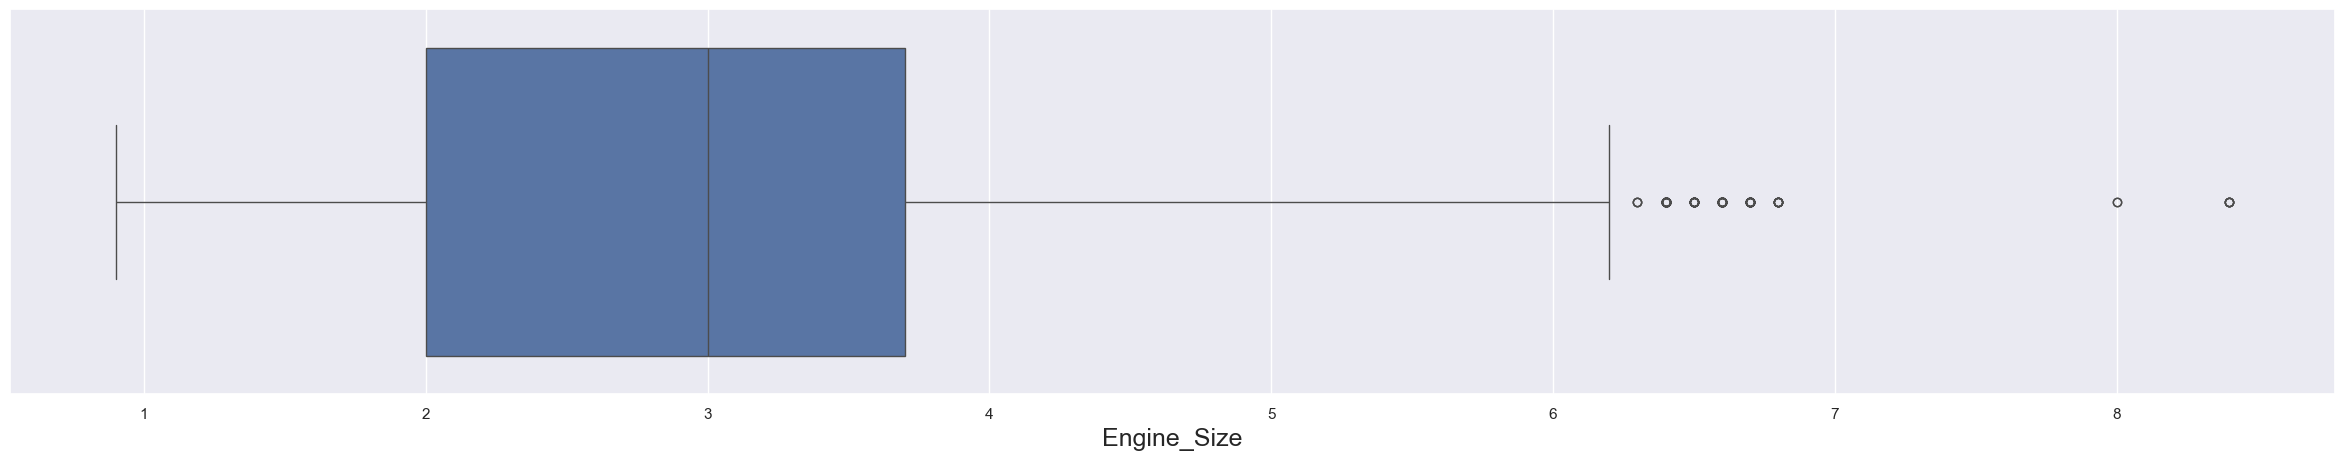

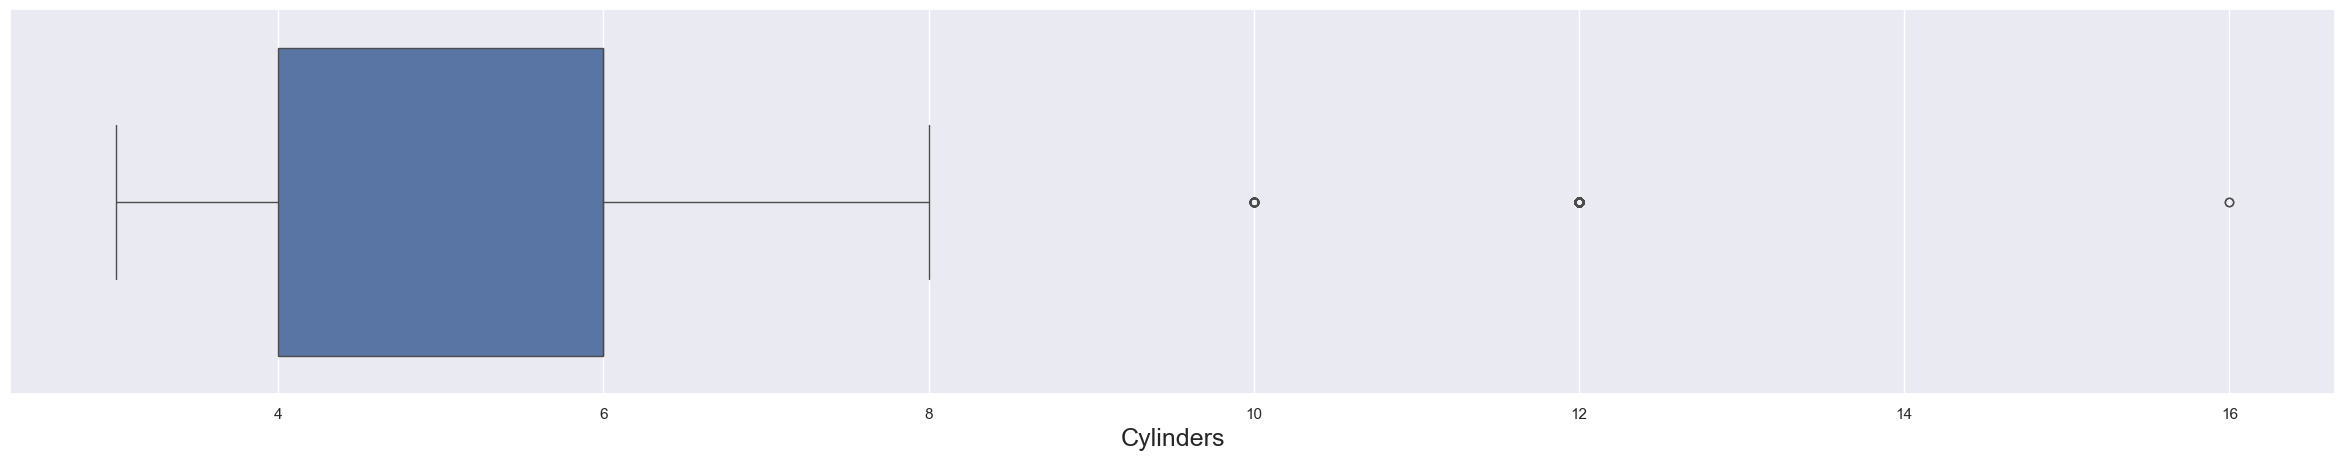

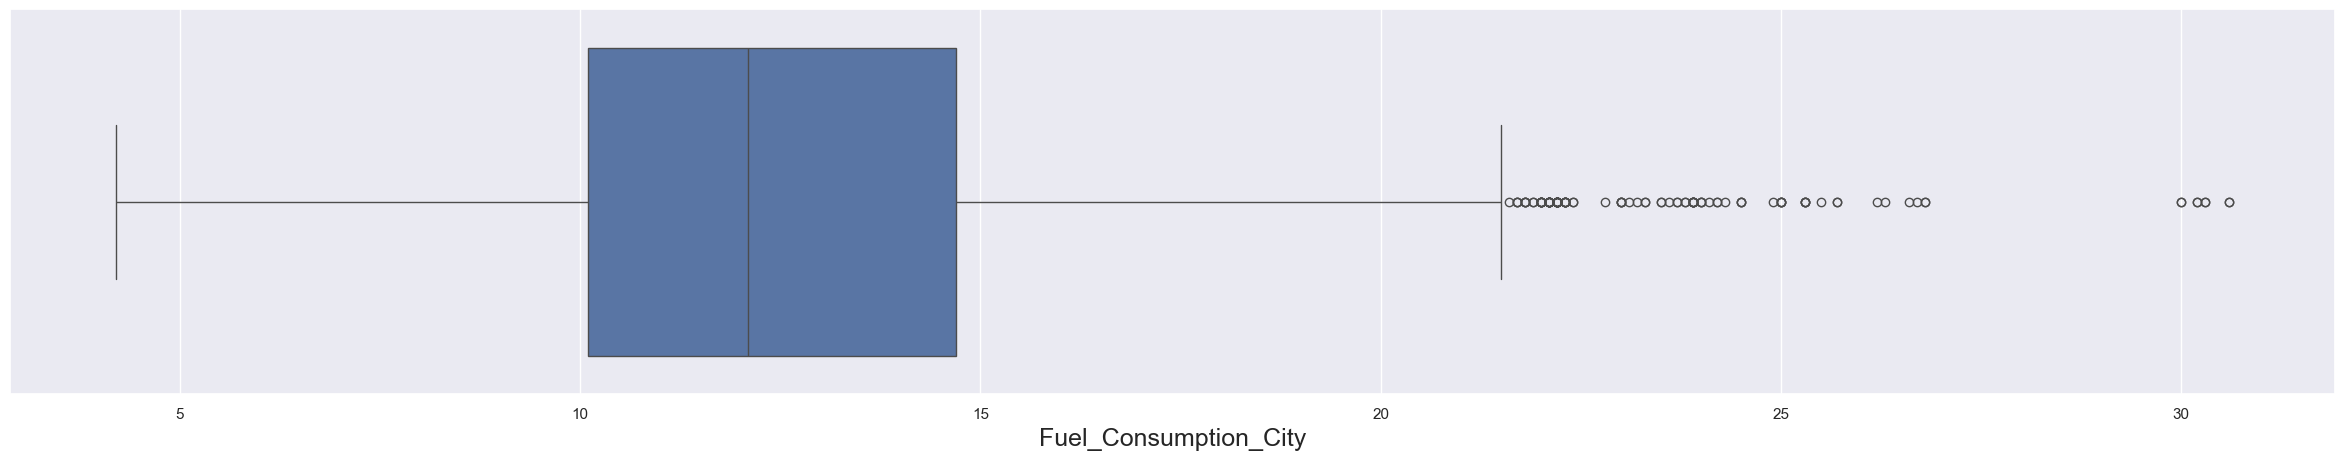

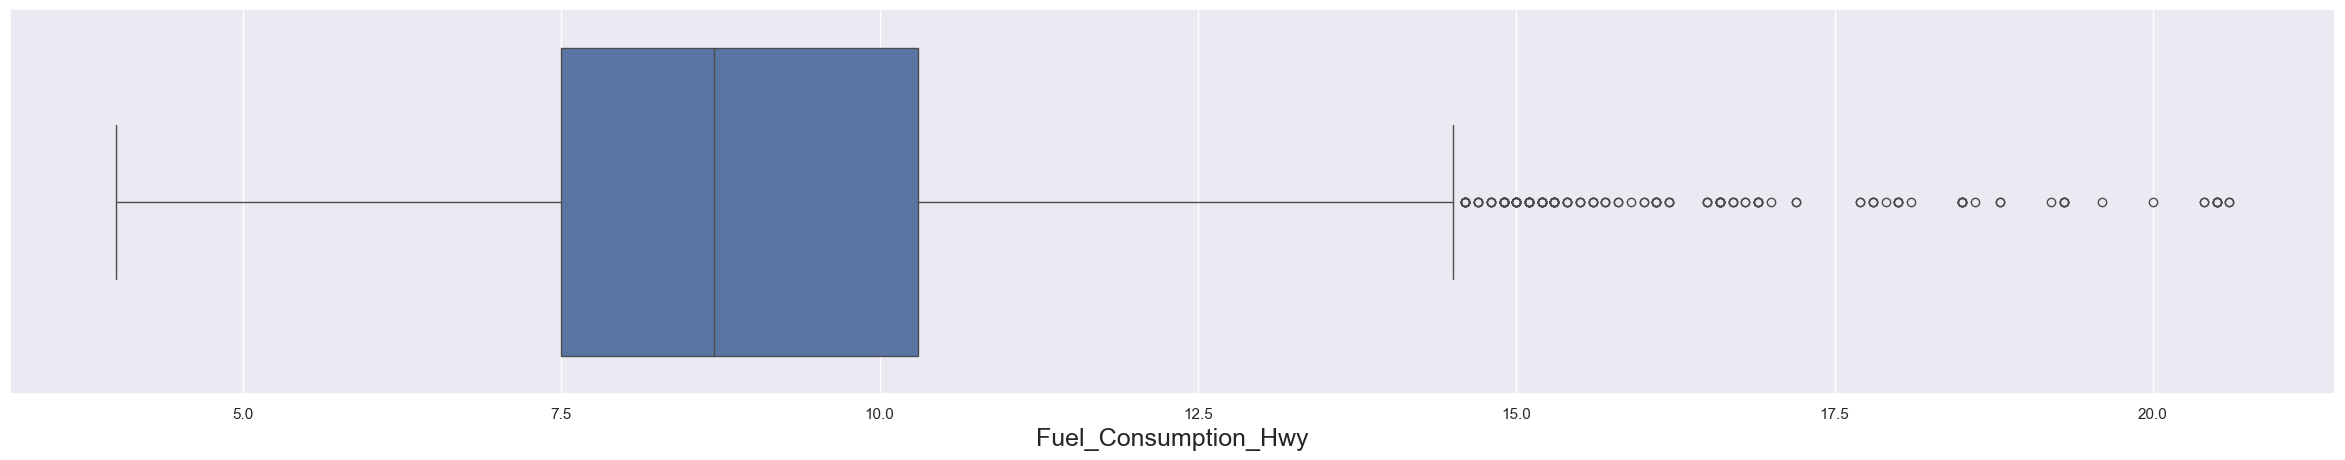

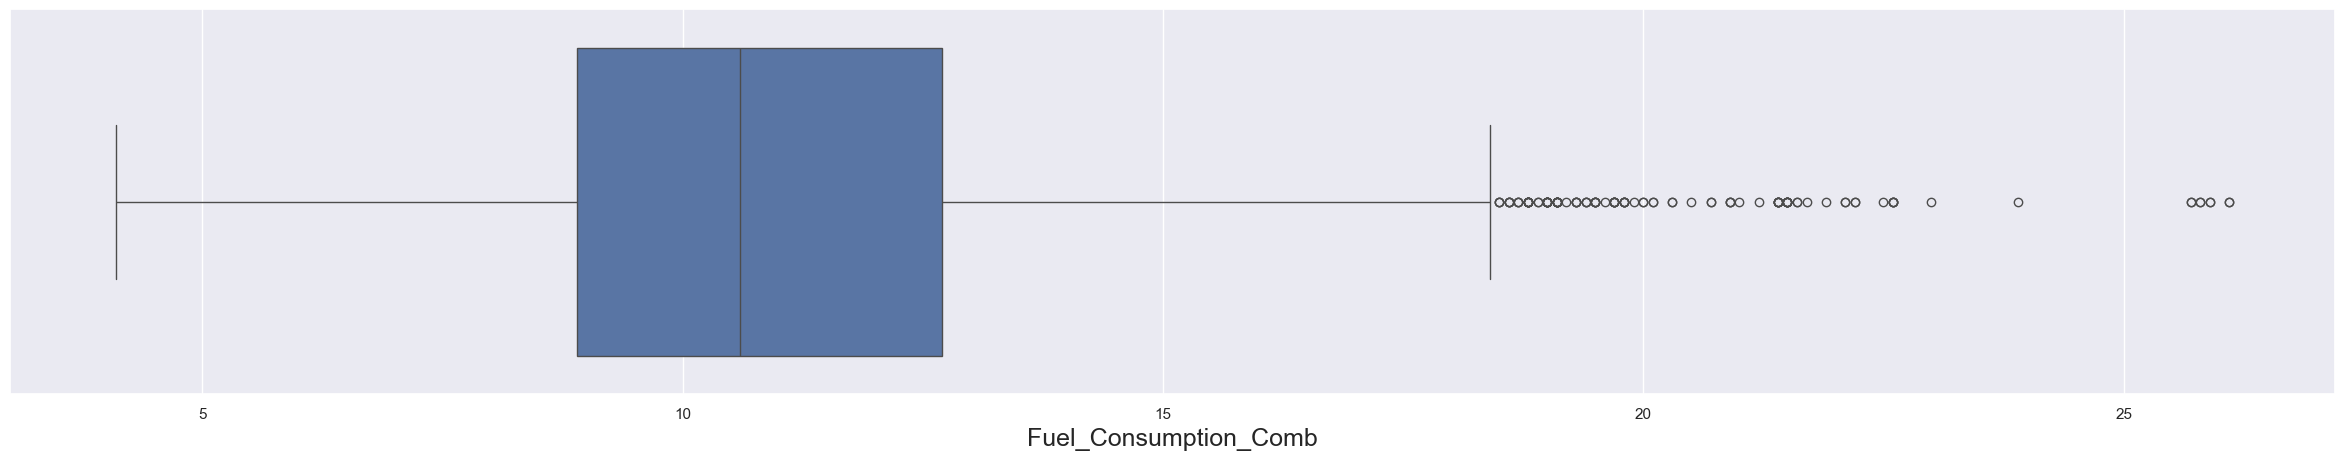

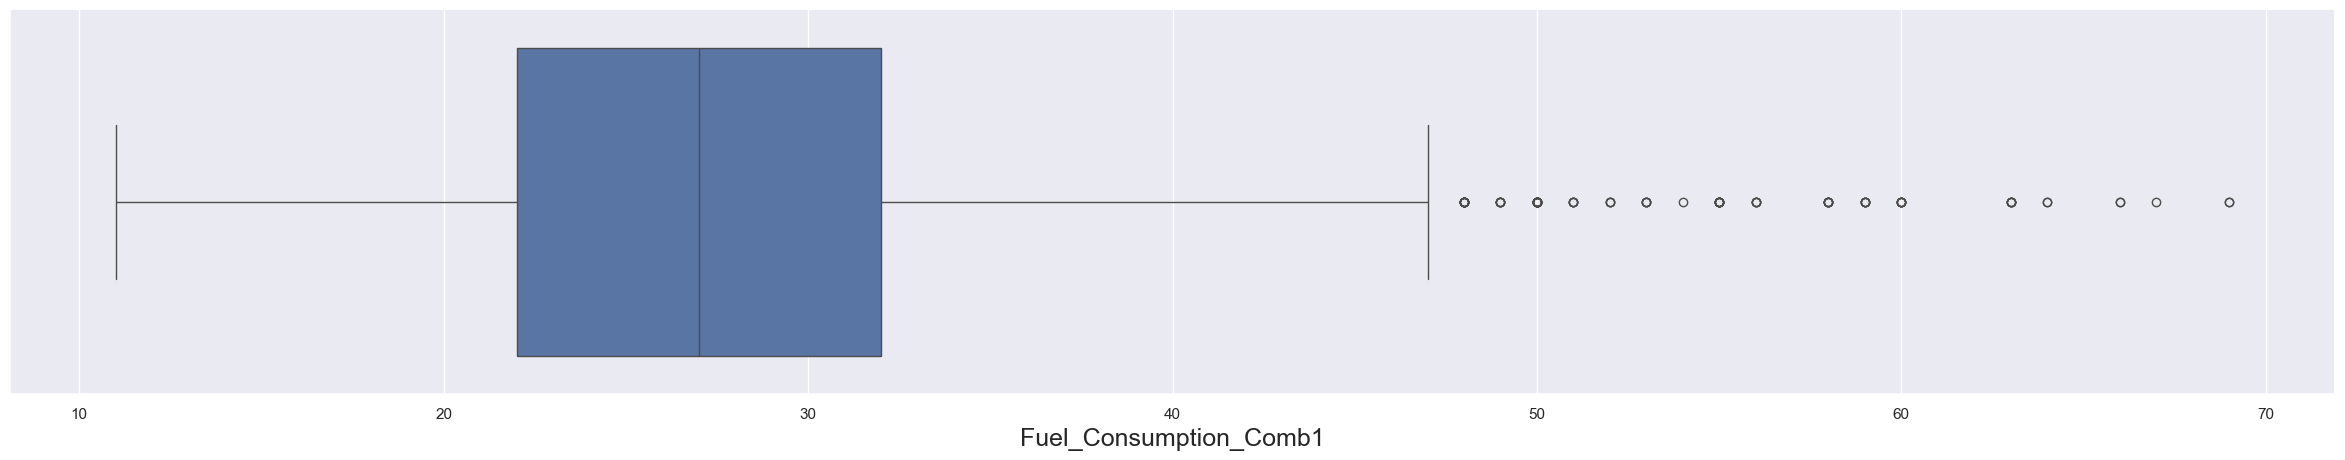

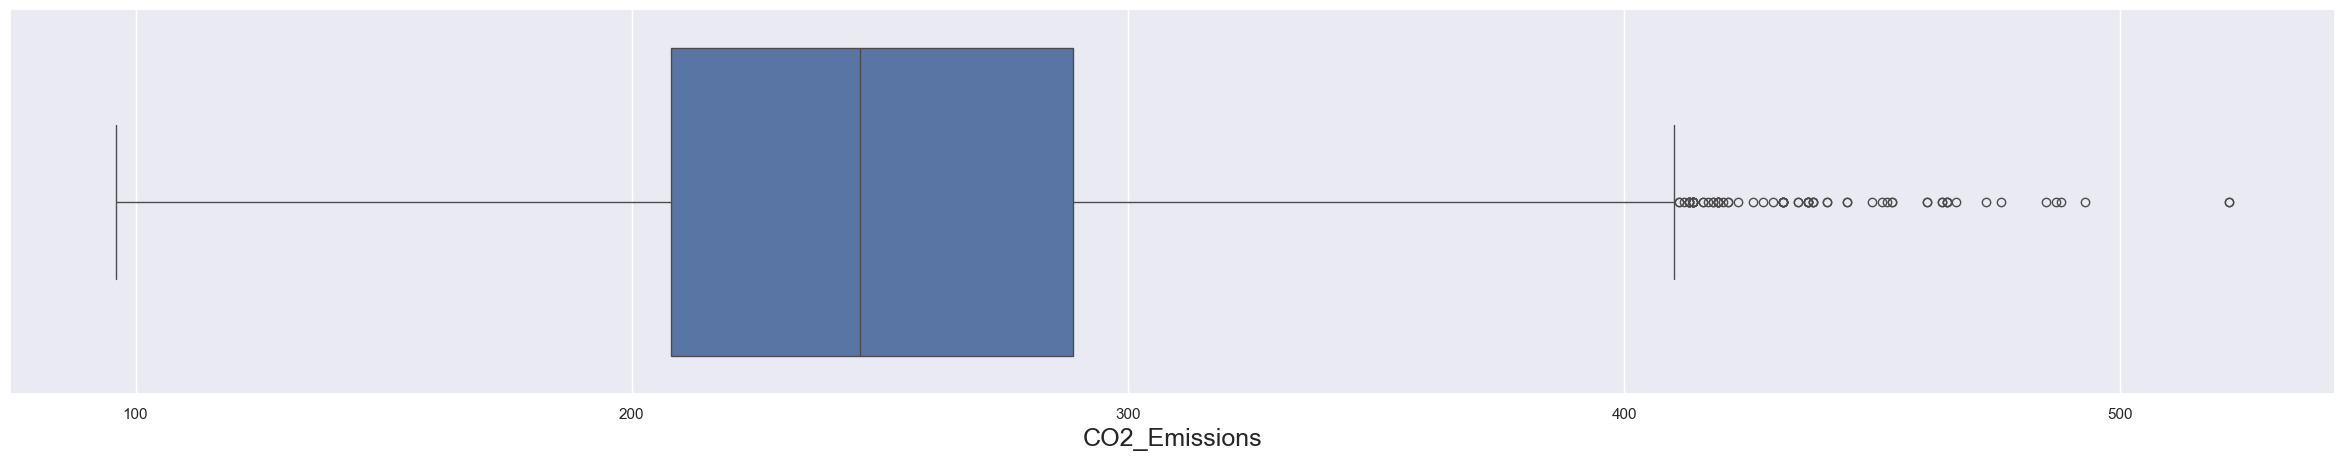

In [122]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

### 5.1.2 Removal of Outliers<a id='rem_out'></a>

**Checking the normality of numeric features**

In [126]:
stat, p_value = shapiro(df_num_features)

print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.5185014597911467
P-Value: 4.371807141727005e-137


Since the numeric features are not normal we are removing the outliers using IQR method

In [129]:
data_numeric = data.select_dtypes(include=[float, int])
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data_numeric < (Q1 - 1.5 * IQR)) | (data_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
data.reset_index(inplace=True, drop=True)

### 5.1.3 Re-checking Correlation<a id='rec_cor'></a>

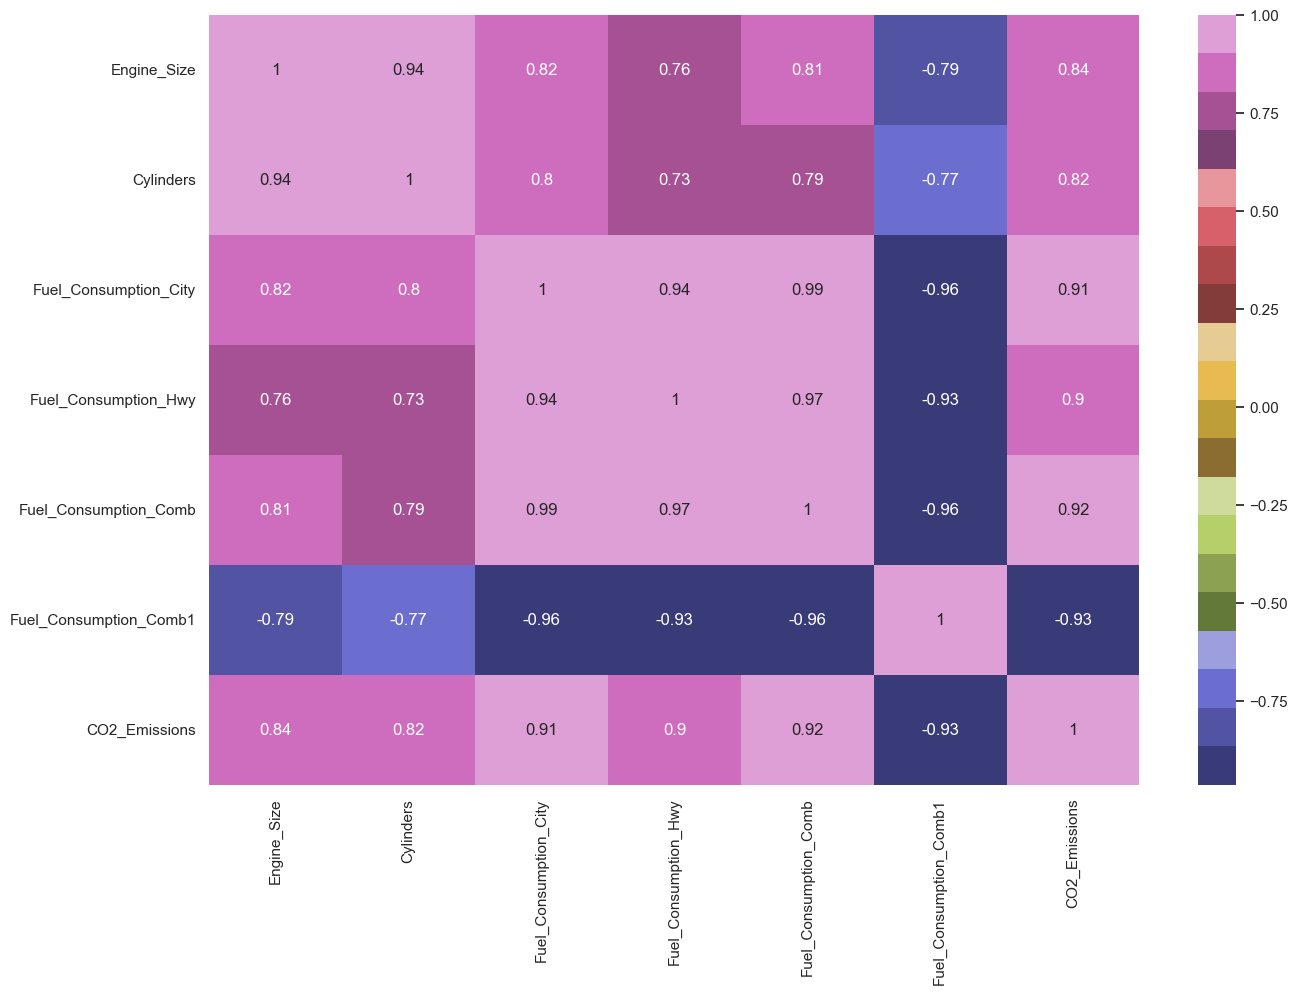

In [132]:
data_num_features = data.select_dtypes(include=np.number)

corr =  data_num_features.corr()

corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20b')
plt.show()

There has been a slight change with respect to the correlation between numeric values

## 5.2 Categorical Encoding<a id='cat_enc'></a>

In [138]:
df_dummies = pd.get_dummies(data = data[["Fuel_Type","Transmission","Make_Type","Vehicle_Class_Type"]], drop_first = True)

df_num_features=data.select_dtypes(include=np.number)

df_comb = pd.concat([df_num_features, df_dummies], axis = 1)

In [140]:
df_comb.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions,Fuel_Type_E,Fuel_Type_N,Fuel_Type_X,Fuel_Type_Z,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,2.000000,4,9.900000,6.700000,8.500000,33,196,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,2.400000,4,11.200000,7.700000,9.600000,29,221,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,3.500000,6,12.700000,9.100000,11.100000,25,255,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
3,3.500000,6,12.100000,8.700000,10.600000,27,244,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
4,3.500000,6,11.900000,7.700000,10.000000,28,230,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False


# 6. Multiple Linear Regression Models<a id='bui_mlr_mod'></a>

In [156]:
X = df_comb.drop(['CO2_Emissions'], axis=1)
y = df_comb['CO2_Emissions']

## 6.1 Multiple Linear Regression - Basic Model<a id='bas_mod'></a>

In [159]:
X = sm.add_constant(X)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [171]:
X_train = X_train.astype(int)
y_train = pd.to_numeric(y_train, errors='coerce')


In [177]:
import pandas as pd
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

In [175]:
MLR_model1 = sm.OLS(y_train, X_train).fit()
MLR_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.019e+04
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:39:05   Log-Likelihood:                -12306.
No. Observations:                4071   AIC:                         2.469e+04
Df Residuals:                    4030   BIC:                         2.495e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      133.0797      3.241     41.056      0.000     126.725     139.435
Engine_Size                  0.4549      0.191      2.387      0.017       0.081       0.828
Cylinders                    0.5651      0.154      3.676      0.000       0.264       0.866
Fuel_Consumption_City        6.9550      0.171     40.657      0.000       6.620       7.290
Fuel_Consumption_Hwy         5.7025      0.171     33.431      0.000       5.368       6.037
Fuel_Consumption_Comb        5.8813      0.235     25.035      0.000       5.421       6.342
Fuel_Consumption_Comb1      -1.5456      0.055    -27.872      0.000      -1.654      -1.437
Fuel_Type_E               -129.5823      0.781   -165.970      0.000    -131.113    -128.052
Fuel_Type_N              -4.444e-14   1.73e-14     -2.571      0.010   -7.83e-14   -1.05e-14
Fuel_Type_X                -31.3156      0.541    -57.838      0.000     -32.377     -30.254
Fuel_Type_Z                -32.0034      0.571    -56.042      0.000     -33.123     -30.884
Transmission_A4             -2.3632      1.455     -1.624      0.104      -5.216       0.490
Transmission_A5             -3.7431      1.294     -2.893      0.004      -6.280      -1.206
Transmission_A6             -5.0555      1.130     -4.472      0.000      -7.272      -2.839
Transmission_A7             -3.9247      1.522     -2.579      0.010      -6.908      -0.941
Transmission_A8             -3.1051      1.141     -2.722      0.007      -5.342      -0.868
Transmission_A9             -2.2325      1.168     -1.912      0.056      -4.522       0.057
Transmission_AM5             5.9915      3.120      1.921      0.055      -0.125      12.108
Transmission_AM6            -1.9363      1.292     -1.498      0.134      -4.470       0.597
Transmission_AM7            -2.9405      1.172     -2.509      0.012      -5.238      -0.643
Transmission_AM8            -4.4896      1.442     -3.113      0.002      -7.317      -1.662
Transmission_AM9          1.717e-14   6.01e-15      2.858      0.004    5.39e-15    2.89e-14
Transmission_AS10           -3.8632      1.208     -3.198      0.001      -6.231      -1.495
Transmission_AS4            -0.0214      5.131     -0.004      0.997     -10.080      10.038
Transmission_AS5            -4.8022      1.647     -2.916      0.004      -8.031      -1.574
Transmission_AS6            -3.6384      1.133     -3.212      0.001      -5.859      -1.418
Transmission_AS7            -4.7055      1.159     -4.058      0.000      -6.979      -2.432
Transmission_AS8            -3.1572      1.119     -2.822      0.005      -5.350      -0.964
Transmission_AS9            -3.8734      1.316     -2.942      0.003      -6.454      -1.293
Transmission_AV             -2.2285      1.213     -1.838      0.066      -4.606       0.149
Transmission_A

1. 99.5% of the variation is dependent on variable CO2_Emissions.
2. The Durbin-Watson test statistic is 2.006 and indicates that there is no auto-correlation
3. The Condition Number is 1.00e+16 which suggests that there is severe mutli-collinearity
4. The features taken into consideration are of different scales

## 6.2 Feature Transformation<a id='fea_tra'></a>

In [181]:
df_num_features.skew()

Engine_Size              0.792424
Cylinders                0.511038
Fuel_Consumption_City    0.535297
Fuel_Consumption_Hwy     0.671428
Fuel_Consumption_Comb    0.578857
Fuel_Consumption_Comb1   0.395943
CO2_Emissions            0.394186
dtype: float64

Since the skewness is relatively low, there is no need to perform any further transformations to reduce skewness

## 6.3 Feature Scaling<a id='fea_sca'></a>

In [185]:
for col in df_num_features.columns:
    print("Column ", col, " :", stats.shapiro(df_num_features[col]))

Column  Engine_Size  : ShapiroResult(statistic=0.9221100764905708, pvalue=1.0507556353241845e-47)
Column  Cylinders  : ShapiroResult(statistic=0.7948747243278652, pvalue=3.1962163399063198e-65)
Column  Fuel_Consumption_City  : ShapiroResult(statistic=0.9760541138544153, pvalue=3.585400504793186e-30)
Column  Fuel_Consumption_Hwy  : ShapiroResult(statistic=0.9660734414633733, pvalue=6.454897604302943e-35)
Column  Fuel_Consumption_Comb  : ShapiroResult(statistic=0.9723236565057775, pvalue=4.23672935041226e-32)
Column  Fuel_Consumption_Comb1  : ShapiroResult(statistic=0.9820072595964404, pvalue=1.498043036431296e-26)
Column  CO2_Emissions  : ShapiroResult(statistic=0.9829149100817964, pvalue=6.384358029540029e-26)


Since none of the numerical features are normally distributed (p-value<0.05) , we will perform Min-Max normalisation to scale the data

In [188]:
df_num_features.drop('CO2_Emissions',axis=1,inplace=True)

In [190]:
mms = MinMaxScaler()
mmsfit = mms.fit(df_num_features)
dfx = pd.DataFrame(mms.fit_transform(df_num_features), columns = ['Engine_Size','Cylinders','Fuel_Consumption_City',
                                                                'Fuel_Consumption_Hwy','Fuel_Consumption_Comb','Fuel_Consumption_Comb1'])

In [192]:
df = pd.concat([dfx, df_dummies], axis = 1)
df.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,Fuel_Type_E,Fuel_Type_N,Fuel_Type_X,Fuel_Type_Z,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,0.207547,0.200000,0.273885,0.220000,0.206612,0.548387,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,0.283019,0.200000,0.356688,0.320000,0.297521,0.419355,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False
2,0.490566,0.600000,0.452229,0.460000,0.421488,0.290323,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
3,0.490566,0.600000,0.414013,0.420000,0.380165,0.354839,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
4,0.490566,0.600000,0.401274,0.320000,0.330579,0.387097,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False


## 6.4 Multiple Linear Regression -  After Feature Scaling<a id='mod_aft_sca'></a>

In [195]:
X = df.copy()
X = sm.add_constant(X)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train = X_train.astype(int)
MLR_model2 = sm.OLS(y_train, X_train).fit()
MLR_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     199.9
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:43:33   Log-Likelihood:                -19532.
No. Observations:                4071   AIC:                         3.914e+04
Df Residuals:                    4031   BIC:                         3.940e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      178.2002      7.364     24.199      0.000     163.763     192.638
Engine_Size                 19.2176      3.708      5.182      0.000      11.947      26.488
Cylinders                   66.7675      1.400     47.684      0.000      64.022      69.513
Fuel_Consumption_City       -4.6950     14.854     -0.316      0.752     -33.818      24.428
Fuel_Consumption_Hwy        -4.8164     17.261     -0.279      0.780     -38.657      29.024
Fuel_Consumption_Comb       -4.6950     14.854     -0.316      0.752     -33.818      24.428
Fuel_Consumption_Comb1     -47.0317     11.312     -4.158      0.000     -69.209     -24.855
Fuel_Type_E                 -2.2592      3.819     -0.592      0.554      -9.747       5.229
Fuel_Type_N                1.83e-13   7.86e-14      2.327      0.020    2.88e-14    3.37e-13
Fuel_Type_X                  8.0494      3.073      2.619      0.009       2.025      14.074
Fuel_Type_Z                 19.8371      3.197      6.205      0.000      13.569      26.105
Transmission_A4             28.1436      8.724      3.226      0.001      11.040      45.247
Transmission_A5             56.2558      7.879      7.140      0.000      40.809      71.702
Transmission_A6             17.6512      6.962      2.535      0.011       4.002      31.300
Transmission_A7             20.9099      9.219      2.268      0.023       2.835      38.985
Transmission_A8             19.5878      6.946      2.820      0.005       5.970      33.205
Transmission_A9             13.8642      7.186      1.929      0.054      -0.224      27.952
Transmission_AM5           -64.9806     18.396     -3.532      0.000    -101.046     -28.915
Transmission_AM6             7.9489      7.863      1.011      0.312      -7.467      23.364
Transmission_AM7            23.0235      7.202      3.197      0.001       8.904      37.143
Transmission_AM8             1.5438      8.743      0.177      0.860     -15.598      18.685
Transmission_AM9           2.32e-14   1.92e-14      1.210      0.226   -1.44e-14    6.08e-14
Transmission_AS10           33.0005      7.364      4.481      0.000      18.562      47.439
Transmission_AS4            35.4340     30.308      1.169      0.242     -23.987      94.855
Transmission_AS5            47.1764      9.948      4.742      0.000      27.673      66.680
Transmission_AS6            19.7204      6.957      2.835      0.005       6.081      33.360
Transmission_AS7            22.1555      7.195      3.079      0.002       8.049      36.262
Transmission_AS8            16.1827      6.935      2.333      0.020       2.586      29.780
Transmission_AS9             6.5354      8.065      0.810      0.418      -9.277      22.348
Transmission_AV            -14.4429      7.396     -1.953      0.051     -28.942       0.057
Transmission_A

1. 99.5% of the variation is dependent on variable CO2_Emissions.
2. The Durbin-Watson test statistic is 2.006 and indicates that there is no auto-correlation
3. The Condition Number is 1.24e+16 which suggests that there is severe mutli-collinearity

## 6.5 Assumptions Before Multiple Linear Regression Model<a id="ass_bef"></a>

### 6.5.1 Assumption #1: If Target Variable is Numeric<a id="tgt_num"></a>

In [206]:
target = df_comb['CO2_Emissions']
target.dtype

dtype('int64')

### 6.5.2 Assumption #2: Presence of Multi-Collinearity<a id="pre_mul_col"></a>

In [209]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_num_features.values, i) for i in range(df_num_features.shape[1])]
vif["Features"] = df_num_features.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,67513.975578,Fuel_Consumption_Comb
1,26997.179323,Fuel_Consumption_City
2,9477.817353,Fuel_Consumption_Hwy
3,115.604448,Cylinders
4,65.575193,Engine_Size
5,9.890684,Fuel_Consumption_Comb1


Since all the features except Fuel_Consumption_Comb1 have a VIF value greater than 10 we cannot proceed with VIF method else we will lose all our features. Hence , we will proceed with PCA

In [212]:
sklearn_pca = PCA()
pcafit = sklearn_pca.fit(df)

pcafit.explained_variance_

array([6.18955498e-01, 3.48264279e-01, 2.56312842e-01, 1.97512877e-01,
       1.70347494e-01, 1.51201027e-01, 1.25893516e-01, 9.80302503e-02,
       8.32425240e-02, 6.17167187e-02, 5.47251279e-02, 4.88212581e-02,
       4.26929739e-02, 3.99197269e-02, 3.66998364e-02, 3.02644112e-02,
       2.66370205e-02, 2.34989550e-02, 2.26126641e-02, 1.80902105e-02,
       1.70269091e-02, 1.47916869e-02, 1.34959924e-02, 1.20214043e-02,
       1.09677943e-02, 1.05164215e-02, 7.79082866e-03, 6.65624676e-03,
       6.14333272e-03, 5.83560356e-03, 5.22906315e-03, 4.51186650e-03,
       3.31044442e-03, 1.68308430e-03, 1.54745136e-03, 8.86251036e-04,
       7.02700504e-04, 3.69102547e-04, 2.02964736e-04, 1.69839710e-04,
       1.39668115e-04, 7.27367364e-06])

In [214]:
pcafit.components_

array([[ 6.77189897e-02,  1.26606447e-01,  5.92644596e-02, ...,
        -1.29955404e-01,  1.19668347e-01, -9.99478153e-02],
       [ 2.07344197e-01,  2.52103511e-01,  1.88697791e-01, ...,
         5.04180156e-01, -5.55812655e-01,  1.36061643e-01],
       [ 2.90714615e-01,  3.75368836e-01,  2.24488938e-01, ...,
        -3.80126805e-01,  1.95096593e-01,  3.30429165e-01],
       ...,
       [ 2.61435669e-04,  2.15209676e-03, -4.88663170e-03, ...,
         1.08116107e-03, -3.40351077e-04,  1.96076641e-03],
       [ 1.60775439e-02, -6.10950350e-03,  1.96040722e-02, ...,
         4.02220225e-03, -3.37549200e-04,  6.71986118e-03],
       [-2.09341382e-04,  2.53239224e-04, -5.55283917e-01, ...,
         2.56178081e-04,  3.53356748e-05,  3.21933895e-04]])

In [216]:
plt.plot(np.cumsum(pcafit.explained_variance_ratio_))
plt.locator_params(axis="x", nbins=len(pcafit.explained_variance_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

As you can see from the above graph, 28 components describe almost 98% of variance in features

In [219]:
df_pca = sklearn_pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca, columns=['pca0','pca1','pca2','pca3','pca4','pca5',
                                       'pca6','pca7','pca8','pca9','pca10','pca11',
                                       'pca12','pca13','pca14','pca15','pca16',
                                       'pca17','pca18','pca19','pca20','pca21','pca22',
                                       'pca23','pca24','pca25','pca26','pca27','pca28',
                                       'pca29','pca30','pca31','pca32','pca33',
                                       'pca34','pca35','pca36','pca37','pca38','pca39',
                                       'pca40','pca41'])

df_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41
0,0.366235,-0.349275,-0.102637,0.780444,0.269253,0.148184,0.185811,-0.242404,0.031876,0.189303,0.431738,-0.054067,0.030326,0.068040,-0.553371,-0.155681,-0.069384,0.215322,0.750003,0.083564,-0.077264,0.005700,-0.051202,0.005207,-0.090200,0.082009,0.104593,-0.035184,0.132749,0.017141,0.182601,0.947390,-0.141062,-0.074724,0.011357,0.066351,-0.024588,-0.001225,-0.008028,0.001166,0.001612,0.002460
1,0.408057,-0.412626,-0.040815,0.848089,0.654582,0.140255,-0.269594,0.447218,0.301536,0.087195,0.240628,-0.063259,0.012718,0.131487,-0.475375,-0.147018,-0.108921,0.128223,0.772795,-0.036032,-0.081108,0.024689,-0.017714,-0.038036,-0.124799,0.088134,-0.054187,-0.091984,0.008939,0.029841,-0.014309,-0.001183,0.086267,-0.030307,0.020753,-0.009862,0.005291,-0.001443,-0.006957,0.000067,-0.003142,-0.001730
2,0.170188,0.453419,-0.020275,0.953257,-0.752466,0.507364,-0.214011,0.074955,0.197907,0.123843,0.371135,-0.218405,-0.120874,0.259291,-0.487990,-0.125477,-0.004123,0.091326,0.610789,-0.083574,-0.253714,-0.033182,0.080605,0.010808,-0.148931,0.127472,-0.035227,-0.095067,-0.016493,0.040372,-0.091947,0.005283,0.009947,-0.045493,0.027625,-0.011924,0.002946,-0.000355,-0.009800,0.000001,-0.000324,0.001726
3,0.159950,0.414894,-0.061608,0.962145,-0.740459,0.507800,-0.200692,0.059056,0.189374,0.120551,0.381416,-0.233217,-0.122150,0.251789,-0.492067,-0.115676,-0.015156,0.097878,0.596924,-0.096869,-0.299686,-0.044135,0.095948,0.024682,-0.153095,0.128808,-0.033205,-0.095582,-0.017955,0.046942,-0.120176,0.015268,0.013390,-0.037740,0.017799,-0.004570,-0.001051,0.000253,-0.010017,0.000500,0.000125,0.002487
4,0.400255,-0.686646,0.470086,0.317636,-0.765099,0.568020,-0.153807,-0.026254,0.258212,0.064339,0.387488,-0.193732,-0.128732,0.164553,-0.545688,-0.123090,-0.014621,0.109162,0.623108,-0.093806,-0.248421,-0.058622,0.044746,0.008880,-0.122783,0.108664,-0.039144,-0.101664,-0.004727,0.036841,-0.076713,0.016299,0.022626,-0.054020,0.031110,-0.005656,0.001103,-0.000788,-0.008393,-0.000861,-0.001650,-0.000354


## 6.6 Multiple Linear Regression - After PCA<a id="mod_pca"></a>

In [222]:
df_pca = sm.add_constant(df_pca)

X = df_pca[['const','pca0','pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22','pca23','pca24','pca25','pca26','pca27','pca28','pca29','pca30','pca31','pca32','pca33']]

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

MLR_model_pca = sm.OLS(y_train, X_train).fit()
MLR_model_pca.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.602e+04
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:44:02   Log-Likelihood:                -11724.
No. Observations:                4071   AIC:                         2.352e+04
Df Residuals:                    4036   BIC:                         2.374e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.0613      0.068   3624.842      0.000     245.928     246.194
pca0          15.4484      0.087    178.355      0.000      15.279      15.618
pca1          52.7871      0.115    460.975      0.000      52.563      53.012
pca2          57.7211      0.135    427.975      0.000      57.457      57.986
pca3         -11.1326      0.153    -72.618      0.000     -11.433     -10.832
pca4         -16.1286      0.165    -97.934      0.000     -16.452     -15.806
pca5          -5.9261      0.176    -33.741      0.000      -6.270      -5.582
pca6         -15.5564      0.190    -81.736      0.000     -15.930     -15.183
pca7          32.9702      0.215    153.254      0.000      32.548      33.392
pca8         -15.2250      0.235    -64.718      0.000     -15.686     -14.764
pca9         -27.1602      0.273    -99.368      0.000     -27.696     -26.624
pca10          4.0594      0.288     14.075      0.000       3.494       4.625
pca11         -4.1984      0.305    -13.785      0.000      -4.796      -3.601
pca12        -24.5433      0.326    -75.296      0.000     -25.182     -23.904
pca13         20.7385      0.341     60.797      0.000      20.070      21.407
pca14         -1.1193      0.352     -3.177      0.002      -1.810      -0.429
pca15        -17.8451      0.386    -46.268      0.000     -18.601     -17.089
pca16         15.4428      0.414     37.257      0.000      14.630      16.255
pca17        -10.9742      0.437    -25.118      0.000     -11.831     -10.118
pca18         11.3911      0.449     25.389      0.000      10.511      12.271
pca19          9.4681      0.501     18.888      0.000       8.485      10.451
pca20         54.5870      0.523    104.468      0.000      53.563      55.611
pca21          7.2453      0.565     12.816      0.000       6.137       8.354
pca22          0.2383      0.580      0.411      0.681      -0.899       1.376
pca23         -1.1167      0.602     -1.854      0.064      -2.297       0.064
pca24         -3.5916      0.641     -5.601      0.000      -4.849      -2.334
pca25          4.9284      0.666      7.395      0.000       3.622       6.235
pca26          8.6128      0.764     11.278      0.000       7.116      10.110
pca27        -27.6892      0.812    -34.107      0.000     -29.281     -26.098
pca28          4.1482      0.890      4.663      0.000       2.404       5.892
pca29        -33.4999      0.938    -35.721      0.000     -35.338     -31.661
pca30        144.3219      0.941    153.356      0.000     142.477     146.167
pca31        -40.4488      1.039    -38.928      0.000     -42.486     -38.412
pca32          5.1583      1.191      4.331      0.000       2.823       7.493
pca33         46.0052      1.630     28.223      0.000      42.809      49.201
==============================================================================
Om

1. 99.3% of the variation is dependent on variable CO2_Emissions.
2. The Durbin-Watson test statistic is 2.053 and indicates that there is no auto-correlation
3. The Condition Number is 23.4 which suggests that there is no mutli-collinearity

## 6.7 Feature Selection<a id="fea_sel"></a>

### 6.7.1 Forward Selection<a id="for_sel"></a>

In [229]:
linreg = LinearRegression()
linreg_forward = sfs(estimator=linreg, k_features ='best', forward=True,
                     verbose=0, scoring='r2')

sfs_forward = linreg_forward.fit(X_train, y_train)

In [231]:
print('Features selected using forward selection are: ')
print(sfs_forward.k_feature_names_)

print('\nR-Squared: ', sfs_forward.k_score_)

Features selected using forward selection are: 
('pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33')

R-Squared:  0.9924840080000232


### 6.7.2 Backward Elimination<a id="bac_eli"></a>

In [234]:
linreg = LinearRegression()
linreg_backward = sfs(estimator = linreg, k_features ='best', forward = False,
                     verbose = 0, scoring = 'r2')

sfs_backward = linreg_backward.fit(X_train, y_train)

In [236]:
print('Features selected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

print('\nR-Squared: ', sfs_backward.k_score_)

Features selected using backward elimination are: 
('const', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33')

R-Squared:  0.9924840080000232


Obtained similar results as that of Forward Selection where all features except and pca_22 have been retained for the betterment of the model

## 6.8 Multiple Linear Regression - Full Model - After Feature Selection<a id="mod_fea_sel"></a>

In [240]:
X = df_pca[['const','pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca14' ,'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33']]

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

MLR_full_model = sm.OLS(y_train, X_train).fit()
MLR_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.651e+04
Date:                Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:45:18   Log-Likelihood:                -11724.
No. Observations:                4071   AIC:                         2.352e+04
Df Residuals:                    4037   BIC:                         2.373e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.0616      0.068   3625.402      0.000     245.929     246.195
pca0          15.4479      0.087    178.387      0.000      15.278      15.618
pca1          52.7869      0.114    461.025      0.000      52.562      53.011
pca2          57.7209      0.135    428.022      0.000      57.456      57.985
pca3         -11.1319      0.153    -72.625      0.000     -11.432     -10.831
pca4         -16.1285      0.165    -97.943      0.000     -16.451     -15.806
pca5          -5.9262      0.176    -33.745      0.000      -6.270      -5.582
pca6         -15.5563      0.190    -81.744      0.000     -15.929     -15.183
pca7          32.9698      0.215    153.270      0.000      32.548      33.392
pca8         -15.2251      0.235    -64.725      0.000     -15.686     -14.764
pca9         -27.1588      0.273    -99.380      0.000     -27.695     -26.623
pca10          4.0600      0.288     14.078      0.000       3.495       4.625
pca11         -4.1990      0.305    -13.788      0.000      -4.796      -3.602
pca12        -24.5430      0.326    -75.303      0.000     -25.182     -23.904
pca13         20.7384      0.341     60.803      0.000      20.070      21.407
pca14         -1.1190      0.352     -3.176      0.002      -1.810      -0.428
pca15        -17.8458      0.386    -46.275      0.000     -18.602     -17.090
pca16         15.4417      0.414     37.259      0.000      14.629      16.254
pca17        -10.9723      0.437    -25.118      0.000     -11.829     -10.116
pca18         11.3902      0.449     25.390      0.000      10.511      12.270
pca19          9.4729      0.501     18.905      0.000       8.491      10.455
pca20         54.5861      0.522    104.478      0.000      53.562      55.610
pca21          7.2371      0.565     12.811      0.000       6.130       8.345
pca23         -1.1254      0.602     -1.870      0.061      -2.305       0.054
pca24         -3.5883      0.641     -5.597      0.000      -4.845      -2.331
pca25          4.9307      0.666      7.400      0.000       3.624       6.237
pca26          8.6112      0.764     11.278      0.000       7.114      10.108
pca27        -27.6884      0.812    -34.109      0.000     -29.280     -26.097
pca28          4.1484      0.890      4.664      0.000       2.404       5.892
pca29        -33.5011      0.938    -35.727      0.000     -35.340     -31.663
pca30        144.3209      0.941    153.371      0.000     142.476     146.166
pca31        -40.4487      1.039    -38.932      0.000     -42.486     -38.412
pca32          5.1581      1.191      4.331      0.000       2.823       7.493
pca33         46.0056      1.630     28.227      0.000      42.810      49.201
==============================================================================
Omnibus:                      640.926   Durbin-Watson:                   2.012
Pr

 1. 99.3% of the variation is dependent on variable CO2_Emissions.
 2. The Durbin-Watson test statistic is 2.012 and indicates that there is no auto-correlation
 3. The Condition Number is 24.0 which suggests that there is no mutli-collinearity

## 6.9 Assumptions After Multiple Linear Regression Model<a id="ass_aft"></a>

### 6.9.1 Assumption #1: Linear Relationship Between Dependent and Independent Variable<a id="lr_dep_ind"></a>

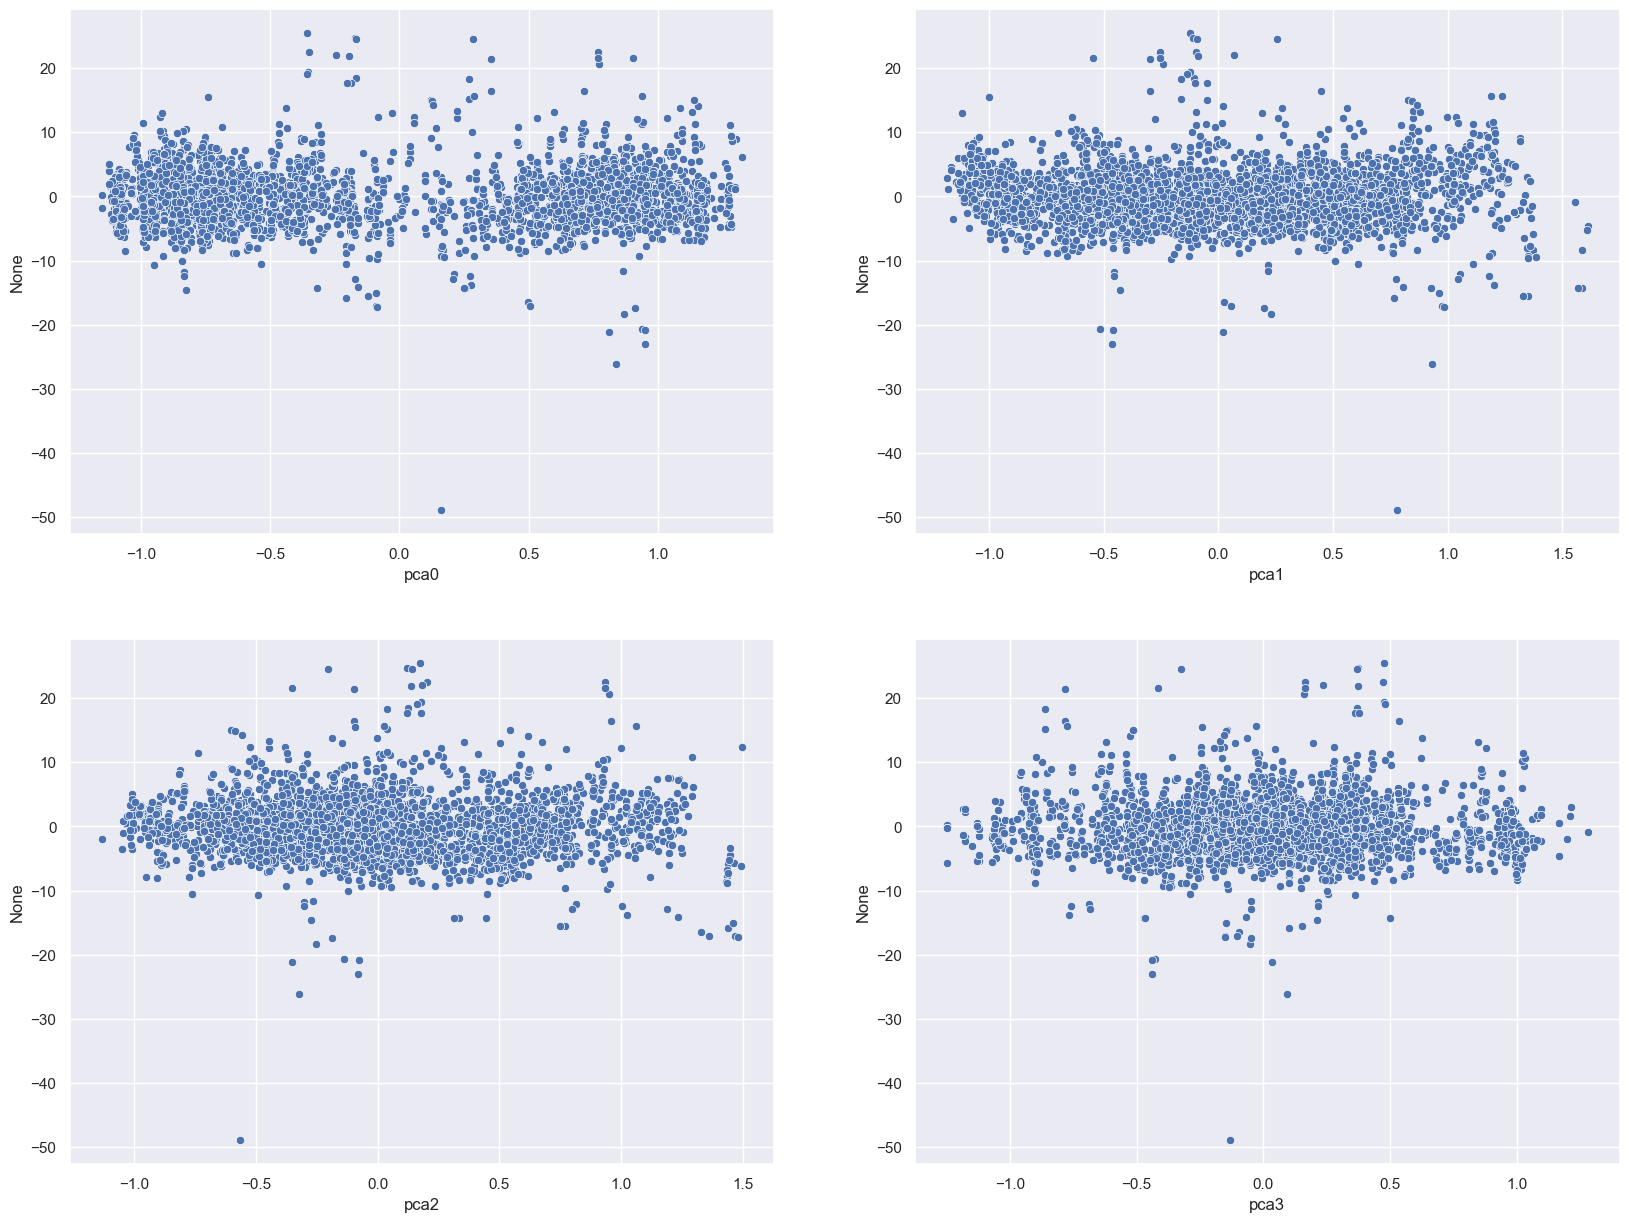

In [253]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train.columns[1:5], ax.flatten()):
    sns.scatterplot(x=X_train[variable], y=MLR_full_model.resid, ax=subplot)

plt.show()


 The above plots show no specific pattern, implies that there is a linearity present in the data

### 6.9.2 Assumption #2: Checking for Autocorrelation<a id="che_aut_cor"></a>

From the above summary [Section 6.8](#mod_fea_sel), we can observe that the value obtained from the `Durbin-Watson` test statistic is close to **2** (= 2.012). Thus, we conclude that there is no autocorrelation.

### 6.9.3 Assumption #3: Checking for Heteroskedasticity<a id="che_het"></a>

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.<br>
The test hypothesis for the Breusch-Pagan test is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> </p>

In [260]:
name = ['f-value','p-value']
test = sms.het_breuschpagan(MLR_full_model.resid, MLR_full_model.model.exog)
lzip(name, test[2:])

[('f-value', 24.920718657758734), ('p-value', 1.1586361964468212e-136)]

We observe that the p-value is less than 0.05; thus, we conclude that there is heteroskedasticity present in the data.

### 6.9.4 Assumption #4: Tests for Normality<a id="tes_nor"></a>

#### 6.9.4.1 Q-Q Plot<a id="qq_plt"></a>

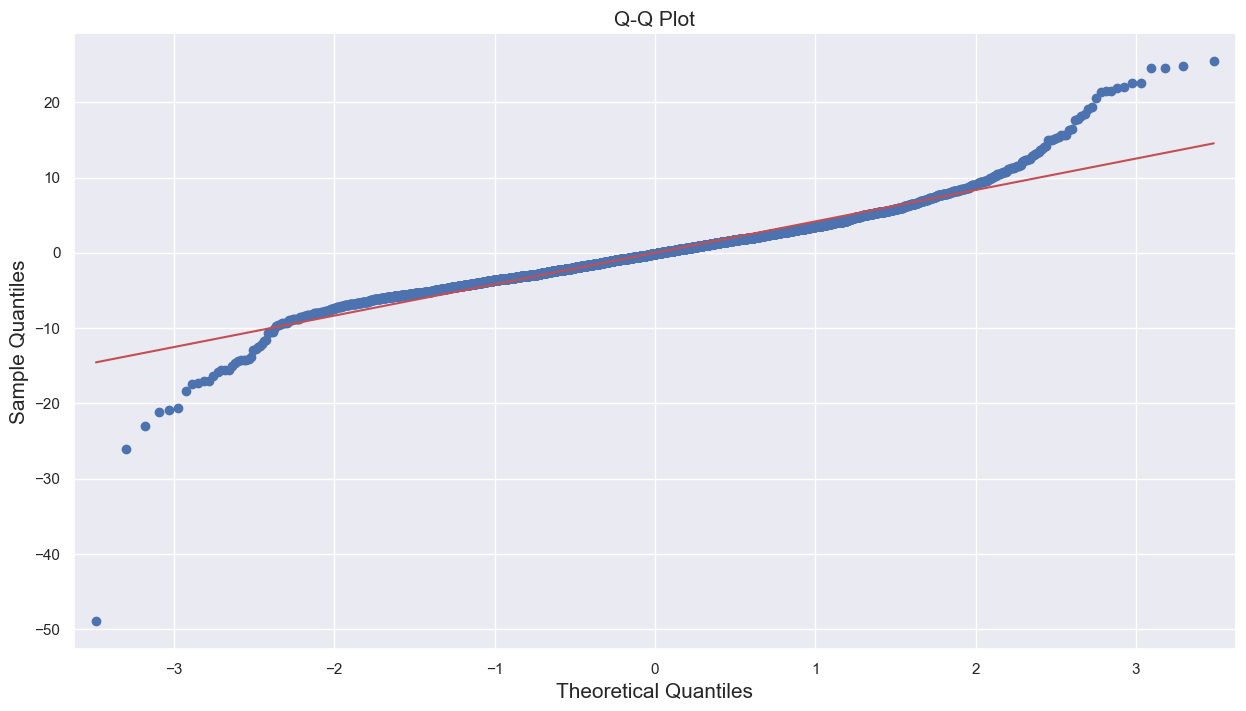

In [265]:
plt.rcParams['figure.figsize'] = [15,8]

qqplot(MLR_full_model.resid, line = 'r')

plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

plt.show()

 The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are not close to the diagonal line, we conclude that the residuals do not follow a `normal distribution.`

#### 6.9.4.2 Shapiro Wilk Test<a id="sha_wil_tes"></a>

The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:<br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  Residuals are normally distributed </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  Residuals are not normally distributed </strong> </p>

In [270]:
stat, p_value = shapiro(MLR_full_model.resid)
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9365528784940643
P-Value: 1.3646466248355934e-38


From the above test we can see that the p-value is 1.365e-38 (less than 0.05), thus we can say that the residuals are not normally distributed.



# 7. Model Evaluation<a id="mod_eva"></a>

## 7.1 Measures of Variation<a id="mea_var"></a>

In [275]:
y_train_pred = MLR_full_model.predict(X_train) 
y_train_pred.head()

5436   275.693034
5691   229.794390
187    209.965940
1393   173.479739
1980   226.468762
dtype: float64

In [277]:
ssr = np.sum((y_train_pred - y_train.mean())**2)
sse = np.sum((y_train - y_train_pred)**2)
sst = np.sum((y_train - y_train.mean())**2)


print('Sum of Squared Regression:',ssr)
print('Sum of Squared Error:',sse)
print('Sum of Sqaured Total:',sst)
print('Sum of SSR and SSE is:',ssr+sse)

Sum of Squared Regression: 10203607.583808046
Sum of Squared Error: 75620.85539609296
Sum of Sqaured Total: 10279228.439204127
Sum of SSR and SSE is: 10279228.43920414


In [279]:
r_sq =MLR_full_model.rsquared

# print the R-squared value
print('R Squared is:',r_sq)

R Squared is: 0.9926433335105501


In [281]:
see = np.sqrt(sse/(len(X_train) - 2))    
print("The standard error of estimate:",see)

The standard error of estimate: 4.310989329468822


## 7.2 Inferences about Intercept and Slope<a id="inf_int_slo"></a>

In [284]:
t_intercept =MLR_full_model.params[0] / MLR_full_model.bse[0]
print('t intercept:',t_intercept)

t intercept: 3625.4024875103587


In [286]:
t_coeff1 =MLR_full_model.params[1] / MLR_full_model.bse[1]
print('t coeff:',t_coeff1)

t coeff: 178.38707821427187


degrees of freedom = n - 1 = 4070 - 1 = 4069

In [289]:
pval = stats.t.sf(np.abs(t_intercept), 4069)*2 
print('p val for intercept:',pval)

p val for intercept: 0.0


## 7.3 Confidence Interval for Intercept and Slope<a id="con_int_slo"></a>

t_table_value = 1.9622

In [293]:
CI_inter_min, CI_inter_max = MLR_full_model.params[0] - (1.9622*MLR_full_model.bse[0]), MLR_full_model.params[0] + (1.9622*MLR_full_model.bse[0])
print('CI for intercept:', [CI_inter_min , CI_inter_max])

CI for intercept: [245.92841173095456, 246.1947667368101]


In [295]:
CI_coeff1_min, CI_coeff1_max = MLR_full_model.params[1] - (1.9622*MLR_full_model.bse[1]), MLR_full_model.params[1] + (1.9622*MLR_full_model.bse[1])
print('CI for coeff1:', [CI_coeff1_min, CI_coeff1_max])

CI for coeff1: [15.277999310811888, 15.617843561249918]


## 7.4 Compare Regression Results<a id="com_reg_res"></a>

In [298]:
r_sq_mlr = MLR_full_model.rsquared
print('r square in regression model:',r_sq_mlr)

r square in regression model: 0.9926433335105501


The value of R-squared is 0.993. Thus, we conclude that the 99.3% variation in the CO2_Emissions is explained by the model.

In [301]:
adj_r_sq = MLR_full_model.rsquared_adj
print('Adjusted r square for regression model:',adj_r_sq)

Adjusted r square for regression model: 0.9925831972722168


Overall F-Test & p-value of the Model

compute f_value using the below formula 


f_value = (r_sq / k-1)/((1- r_sq)/n-k)

k = number of beta coefficients
n = number of observations

In [305]:
k = len(X_train.columns)
n = len(X_train)

f_value = (r_sq_mlr / (k - 1))/((1-r_sq_mlr)/(n - k))
print('f value for regression model:',f_value)

f value for regression model: 16506.575087181624


degrees of freedom 
dfn = k-1 = 32-1 = 31
dfd = n-k = 4396-32 = 4364

In [308]:
p_val = stats.f.sf(f_value, dfn = 31, dfd = 4364)
print('p value for regression model:',p_val)

p value for regression model: 0.0


As, the p-value is 0 which is less than 0.05, we accept the alternate hypothesis; i.e. the model is significant.

# 8. Model Performance<a id="mod_per"></a>

In [312]:
train_pred = MLR_full_model.predict(X_train)
test_pred = MLR_full_model.predict(X_test)

## 8.1 Mean Squared Error (MSE)<a id="mse"></a>

In [315]:
mse_train = round(mean_squared_error(y_train, train_pred),4)
mse_test = round(mean_squared_error(y_test, test_pred),4)

print("Mean Squared Error (MSE) on training set: ", mse_train)
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  18.5755
Mean Squared Error (MSE) on test set:  24.4915


## 8.2 Root Mean Squared Error (RMSE)<a id="rmse"></a>

In [318]:
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)

mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)

print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  4.3099
Root Mean Squared Error (RMSE) on test set:  4.9489


## 8.3 Mean Absolute Error (MAE)<a id="mae"></a>

In [321]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)
mae_test = round(mean_absolute_error(y_test, test_pred),4)


print("Mean Absolute Error (MAE) on training set: ", mae_train)
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  3.1134
Mean Absolute Error (MAE) on test set:  3.1096


## 8.4 Mean Absolute Percentage Error (MAPE)<a id="mape"></a>

In [324]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [326]:
mape_train = round(mape(y_train, train_pred),4)
mape_test = round(mape(y_test, test_pred),4)

print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  1.3148
Mean Absolute Percentage Error (MAPE) on test set:  1.3016


## 8.5 Result Table<a id="res_tab"></a>

In [331]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define column names
cols = ['Model_Name', 'R-squared', 'Adj. R-squared', 'MSE', 'RMSE', 'MAE', 'MAPE']

# Create an empty DataFrame
result_table = pd.DataFrame(columns=cols)

# Compute model metrics
MLR_full_model_metrics = pd.Series({
    'Model_Name': "MLR Full Model",
    'R-squared': MLR_full_model.rsquared,
    'Adj. R-squared': MLR_full_model.rsquared_adj,
    'MSE': mean_squared_error(y_test, test_pred),
    'RMSE': mean_squared_error(y_test, test_pred, squared=False),  # RMSE = sqrt(MSE)
    'MAE': mean_absolute_error(y_test, test_pred),
    'MAPE': mape(y_test, test_pred)
})

result_table.loc[len(result_table)] = MLR_full_model_metrics

print(result_table)


       Model_Name R-squared Adj. R-squared       MSE     RMSE      MAE  \
0  MLR Full Model  0.992643       0.992583 24.491506 4.948889 3.109577   

      MAPE  
0 1.301550  


The bias is low and variance is high, hence we can assume that the model is a complex one. We will have to employ optimization techniques to reduce the complexity and RMSE.